In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import numpy as np

folder = "./data"

users = ["Mix-4labels"]
files = ["S-diagonal1","B-diagonal1",
         "S-diagonal3","B-diagonal1",
         "S-doublepoling1","B-doublepoling1", 
         "S-doublepoling3","B-doublepoling2", 
         "S-herringbone1","B-herringbone1", 
         "S-herringbone2","B-herringbone2", 
         "S-kickdoublepoling1","B-kickdoublepoling1", 
         "S-kickdoublepoling2","B-kickdoublepoling2"]

cross = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

sensors = ["s1", "s2"]

tW = list(range(-10000, 100, 50))

print(tW)
print(len(tW))

tStep = 150

index_t = 0

def getAVG(vs):
    if len(vs) == 0:
        return 0
    if np.isnan(np.median(vs)):
        return -1
    return np.median(vs)

def smoothData(data):
    for ix in range(1, 6):
        data[:, ix] = data[:, ix].astype(float)
        lastV = 0.0
        for jx in range(len(data[:, ix])):
            data[jx, ix] = data[jx, ix] * 0.2 + lastV * 0.8
            lastV = data[jx, ix]

def smoothDataTime(data):
    data[:, 0] = data[:, 0].astype(float)
    tA = []
    lastT = -1
    for jx in range(len(data[:, 0])):
        t0 = data[jx, 0]
        if t0 > lastT + 50:
            lastT = t0
            tA.append(t0)
    retV = np.zeros((len(tA), 7))
    for ix in range(1, 7):
        data[:, ix] = data[:, ix].astype(float)
        lastT = -1
        lV = []
        vA = []
        for jx in range(len(data[:, ix])):
            t0 = data[jx, 0]
            if t0 > lastT + 50:
                lastT = t0
                vA.append(np.median(lV))
                lV = []
            else:
                lV.append(data[jx, ix])
        retV[:, ix] = np.array(vA)
    retV[:, 0] = np.array(tA)
    return retV

def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file)
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')
            if len(line) != 7:
                print("NOT 7# in ", count, " -> ", line)
                continue
            try:
                ret.append([float(x) for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret

def getLabels(t0, labels):
    for l in labels:
        if l[0] <= t0 <= l[1]:
            return l[2]
    return None


[-10000, -9950, -9900, -9850, -9800, -9750, -9700, -9650, -9600, -9550, -9500, -9450, -9400, -9350, -9300, -9250, -9200, -9150, -9100, -9050, -9000, -8950, -8900, -8850, -8800, -8750, -8700, -8650, -8600, -8550, -8500, -8450, -8400, -8350, -8300, -8250, -8200, -8150, -8100, -8050, -8000, -7950, -7900, -7850, -7800, -7750, -7700, -7650, -7600, -7550, -7500, -7450, -7400, -7350, -7300, -7250, -7200, -7150, -7100, -7050, -7000, -6950, -6900, -6850, -6800, -6750, -6700, -6650, -6600, -6550, -6500, -6450, -6400, -6350, -6300, -6250, -6200, -6150, -6100, -6050, -6000, -5950, -5900, -5850, -5800, -5750, -5700, -5650, -5600, -5550, -5500, -5450, -5400, -5350, -5300, -5250, -5200, -5150, -5100, -5050, -5000, -4950, -4900, -4850, -4800, -4750, -4700, -4650, -4600, -4550, -4500, -4450, -4400, -4350, -4300, -4250, -4200, -4150, -4100, -4050, -4000, -3950, -3900, -3850, -3800, -3750, -3700, -3650, -3600, -3550, -3500, -3450, -3400, -3350, -3300, -3250, -3200, -3150, -3100, -3050, -3000, -2950, -290

In [4]:
#for ixu,us in enumerate(users):    
    #for ixc,cl in enumerate(files):
            #for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                #print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                #data=np.array(data)
                #print(data.shape)
                #data=smoothDataTime(data)
                #print(data.shape)
                #for s in range(1,7):
                #    prinUserSensorData(data, "us:"+us+"file:"+cl+"#sensor:"+sn,s)

In [5]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        xi1.append(getAVG(ag1[:,4].astype(float)))
                        xi2.append(getAVG(ag1[:,5].astype(float)))
                        xi3.append(getAVG(ag1[:,6].astype(float)))
                        
                        #xi4.append(getAVG(ag1[:,4].astype(np.float)))
                        #xi5.append(getAVG(ag1[:,5].astype(np.float)))
                        #xi6.append(getAVG(ag1[:,6].astype(np.float)))                        

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    #xi.append(xi4)
                    #xi.append(xi5)
                    #xi.append(xi6)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                print(len(cross))
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data/Mix-4labels/S-diagonal1/s1.txt
./data/Mix-4labels/S-diagonal1/s2.txt
[[1000 25000 'Diagonal']
 [50000 75000 'Diagonal']
 [100000 128000 'Diagonal']
 [155000 180000 'Diagonal']
 [210000 235000 'Diagonal']]
S-diagonal1  tMaxMin: 262888
3.8046249020309086 t# 10000
16
3.861694275561373 t# 10150
16
3.918763649091836 t# 10300
16
3.9758330226223 t# 10450
16
4.032902396152763 t# 10600
16
4.089971769683227 t# 10750
16
4.14704114321369 t# 10900
16
4.204110516744154 t# 11050
16
4.261179890274618 t# 11200
16
4.318249263805082 t# 11350
16
4.375318637335545 t# 11500
16
4.432388010866008 t# 11650
16
4.489457384396473 t# 11800
16
4.5465267579269355 t# 11950
16
4.6035961314574 t# 12100
16
4.660665504987863 t# 12250
16
4.717734878518327 t# 12400
16
4.77480425204879 t# 12550
16
4.831873625579254 t# 12700
16
4.888942999109718 t# 12850
16
4.9460123726401815 t# 13000
16
5.003081746170645 t# 13150
16
5.060151119701109 t# 13300
16
5.117220493231573 t# 13450
16
5.174289866762035 t# 13600
16
5.2313592402

16
19.784049490560726 t# 52000
16
19.84111886409119 t# 52150
16
19.898188237621653 t# 52300
16
19.955257611152117 t# 52450
16
20.01232698468258 t# 52600
16
20.069396358213044 t# 52750
16
20.126465731743508 t# 52900
16
20.183535105273968 t# 53050
16
20.240604478804435 t# 53200
16
20.2976738523349 t# 53350
16
20.354743225865363 t# 53500
16
20.411812599395827 t# 53650
16
20.46888197292629 t# 53800
16
20.525951346456754 t# 53950
16
20.583020719987218 t# 54100
16
20.640090093517678 t# 54250
16
20.69715946704814 t# 54400
16
20.754228840578605 t# 54550
16
20.81129821410907 t# 54700
16
20.868367587639536 t# 54850
16
20.92543696117 t# 55000
16
20.982506334700464 t# 55150
16
21.039575708230927 t# 55300
16
21.096645081761388 t# 55450
16
21.15371445529185 t# 55600
16
21.210783828822315 t# 55750
16
21.26785320235278 t# 55900
16
21.324922575883242 t# 56050
16
21.381991949413706 t# 56200
16
21.43906132294417 t# 56350
16
21.496130696474637 t# 56500
16
21.5532000700051 t# 56650
16
21.61026944353556 t# 

16
38.27452651443094 t# 100600
16
38.331595887961406 t# 100750
16
38.38866526149187 t# 100900
16
38.44573463502233 t# 101050
16
38.5028040085528 t# 101200
16
38.55987338208326 t# 101350
16
38.61694275561373 t# 101500
16
38.67401212914419 t# 101650
16
38.731081502674655 t# 101800
16
38.788150876205115 t# 101950
16
38.845220249735576 t# 102100
16
38.90228962326604 t# 102250
16
38.9593589967965 t# 102400
16
39.01642837032697 t# 102550
16
39.07349774385743 t# 102700
16
39.1305671173879 t# 102850
16
39.18763649091836 t# 103000
16
39.244705864448825 t# 103150
16
39.301775237979285 t# 103300
16
39.35884461150975 t# 103450
16
39.41591398504021 t# 103600
16
39.47298335857068 t# 103750
16
39.53005273210114 t# 103900
16
39.58712210563161 t# 104050
16
39.644191479162075 t# 104200
16
39.701260852692535 t# 104350
16
39.758330226223 t# 104500
16
39.81539959975346 t# 104650
16
39.87246897328392 t# 104800
16
39.92953834681438 t# 104950
16
39.98660772034485 t# 105100
16
40.04367709387531 t# 105250
16
40

16
59.10484785305017 t# 155350
16
59.16191722658063 t# 155500
16
59.21898660011109 t# 155650
16
59.27605597364156 t# 155800
16
59.33312534717202 t# 155950
16
59.39019472070248 t# 156100
16
59.447264094232956 t# 156250
16
59.504333467763416 t# 156400
16
59.56140284129388 t# 156550
16
59.61847221482434 t# 156700
16
59.67554158835481 t# 156850
16
59.73261096188527 t# 157000
16
59.78968033541573 t# 157150
16
59.84674970894619 t# 157300
16
59.90381908247666 t# 157450
16
59.96088845600712 t# 157600
16
60.01795782953758 t# 157750
16
60.07502720306805 t# 157900
16
60.132096576598514 t# 158050
16
60.189165950128974 t# 158200
16
60.246235323659434 t# 158350
16
60.30330469718991 t# 158500
16
60.36037407072037 t# 158650
16
60.41744344425083 t# 158800
16
60.47451281778129 t# 158950
16
60.53158219131176 t# 159100
16
60.58865156484222 t# 159250
16
60.64572093837268 t# 159400
16
60.70279031190316 t# 159550
16
60.75985968543362 t# 159700
16
60.81692905896408 t# 159850
16
60.87399843249454 t# 160000
16


16
80.10637731226078 t# 210550
16
80.16344668579126 t# 210700
16
80.22051605932171 t# 210850
16
80.27758543285218 t# 211000
16
80.33465480638264 t# 211150
16
80.3917241799131 t# 211300
16
80.44879355344356 t# 211450
16
80.50586292697403 t# 211600
16
80.5629323005045 t# 211750
16
80.62000167403495 t# 211900
16
80.67707104756542 t# 212050
16
80.73414042109587 t# 212200
16
80.79120979462635 t# 212350
16
80.84827916815681 t# 212500
16
80.90534854168727 t# 212650
16
80.96241791521774 t# 212800
16
81.01948728874821 t# 212950
16
81.07655666227866 t# 213100
16
81.13362603580913 t# 213250
16
81.1906954093396 t# 213400
16
81.24776478287006 t# 213550
16
81.30483415640052 t# 213700
16
81.36190352993098 t# 213850
16
81.41897290346145 t# 214000
16
81.4760422769919 t# 214150
16
81.53311165052237 t# 214300
16
81.59018102405284 t# 214450
16
81.6472503975833 t# 214600
16
81.70431977111376 t# 214750
16
81.76138914464423 t# 214900
16
81.8184585181747 t# 215050
16
81.87552789170516 t# 215200
16
81.93259726

./data/Mix-4labels/B-diagonal1/s2.txt
[[28000 90000 'Diagonal']
 [160000 220000 'Diagonal']]
B-diagonal1  tMaxMin: 755719
1.323330717549615 t# 10000
1.3431806783128593 t# 10150
1.3630306390761036 t# 10300
1.3828805998393476 t# 10450
1.402730560602592 t# 10600
1.422580521365836 t# 10750
1.4424304821290803 t# 10900
1.4622804428923246 t# 11050
1.4821304036555687 t# 11200
1.501980364418813 t# 11350
1.5218303251820573 t# 11500
1.5416802859453014 t# 11650
1.5615302467085457 t# 11800
1.58138020747179 t# 11950
1.6012301682350343 t# 12100
1.6210801289982784 t# 12250
1.6409300897615227 t# 12400
1.660780050524767 t# 12550
1.680630011288011 t# 12700
1.7004799720512553 t# 12850
1.7203299328144996 t# 13000
1.7401798935777437 t# 13150
1.760029854340988 t# 13300
1.7798798151042323 t# 13450
1.7997297758674764 t# 13600
1.8195797366307207 t# 13750
1.8394296973939648 t# 13900
1.859279658157209 t# 14050
1.8791296189204534 t# 14200
1.8989795796836975 t# 14350
1.9188295404469418 t# 14500
1.9386795012101858 t

16
6.861469770494753 t# 51850
16
6.881319731257999 t# 52000
16
6.9011696920212415 t# 52150
16
6.921019652784486 t# 52300
16
6.94086961354773 t# 52450
16
6.960719574310975 t# 52600
16
6.980569535074219 t# 52750
16
7.0004194958374635 t# 52900
16
7.020269456600707 t# 53050
16
7.040119417363952 t# 53200
16
7.059969378127196 t# 53350
16
7.079819338890441 t# 53500
16
7.099669299653684 t# 53650
16
7.119519260416929 t# 53800
16
7.139369221180172 t# 53950
16
7.159219181943417 t# 54100
16
7.179069142706661 t# 54250
16
7.198919103469906 t# 54400
16
7.2187690642331495 t# 54550
16
7.238619024996394 t# 54700
16
7.258468985759638 t# 54850
16
7.278318946522883 t# 55000
16
7.298168907286126 t# 55150
16
7.318018868049371 t# 55300
16
7.337868828812614 t# 55450
16
7.357718789575859 t# 55600
16
7.377568750339103 t# 55750
16
7.397418711102348 t# 55900
16
7.417268671865592 t# 56050
16
7.437118632628836 t# 56200
16
7.45696859339208 t# 56350
16
7.476818554155325 t# 56500
16
7.496668514918568 t# 56650
16
7.5165

16
21.193141441557085 t# 160150
16
21.212991402320327 t# 160300
16
21.232841363083573 t# 160450
16
21.25269132384682 t# 160600
16
21.27254128461006 t# 160750
16
21.292391245373306 t# 160900
16
21.312241206136548 t# 161050
16
21.332091166899794 t# 161200
16
21.35194112766304 t# 161350
16
21.37179108842628 t# 161500
16
21.391641049189523 t# 161650
16
21.411491009952773 t# 161800
16
21.431340970716015 t# 161950
16
21.451190931479257 t# 162100
16
21.471040892242502 t# 162250
16
21.490890853005748 t# 162400
16
21.51074081376899 t# 162550
16
21.530590774532236 t# 162700
16
21.550440735295478 t# 162850
16
21.570290696058724 t# 163000
16
21.59014065682197 t# 163150
16
21.60999061758521 t# 163300
16
21.629840578348457 t# 163450
16
21.649690539111702 t# 163600
16
21.669540499874945 t# 163750
16
21.68939046063819 t# 163900
16
21.709240421401436 t# 164050
16
21.729090382164678 t# 164200
16
21.748940342927924 t# 164350
16
21.768790303691166 t# 164500
16
21.78864026445441 t# 164650
16
21.80849022521

16
26.354131240000584 t# 199150
16
26.373981200763826 t# 199300
16
26.39383116152707 t# 199450
16
26.413681122290317 t# 199600
16
26.43353108305356 t# 199750
16
26.453381043816805 t# 199900
16
26.47323100458005 t# 200050
16
26.493080965343292 t# 200200
16
26.512930926106538 t# 200350
16
26.532780886869777 t# 200500
16
26.552630847633026 t# 200650
16
26.57248080839627 t# 200800
16
26.59233076915951 t# 200950
16
26.61218072992276 t# 201100
16
26.632030690686005 t# 201250
16
26.651880651449243 t# 201400
16
26.671730612212492 t# 201550
16
26.69158057297573 t# 201700
16
26.711430533738977 t# 201850
16
26.731280494502226 t# 202000
16
26.751130455265464 t# 202150
16
26.77098041602871 t# 202300
16
26.79083037679196 t# 202450
16
26.810680337555198 t# 202600
16
26.830530298318443 t# 202750
16
26.850380259081685 t# 202900
16
26.87023021984493 t# 203050
16
26.890080180608177 t# 203200
16
26.90993014137142 t# 203350
16
26.929780102134664 t# 203500
16
26.94963006289791 t# 203650
16
26.96948002366115

[[10000 30000 'Diagonal']
 [53000 75000 'Diagonal']
 [100000 128000 'Diagonal']
 [150000 175000 'Diagonal']
 [200000 225000 'Diagonal']]
S-diagonal3  tMaxMin: 248969
4.0173711126912774 t# 10000
16
4.077631679381646 t# 10150
16
4.137892246072015 t# 10300
16
4.198152812762385 t# 10450
16
4.258413379452754 t# 10600
16
4.3186739461431225 t# 10750
16
4.378934512833492 t# 10900
16
4.439195079523861 t# 11050
16
4.49945564621423 t# 11200
16
4.5597162129046 t# 11350
16
4.619976779594968 t# 11500
16
4.680237346285337 t# 11650
16
4.740497912975707 t# 11800
16
4.800758479666077 t# 11950
16
4.8610190463564455 t# 12100
16
4.921279613046814 t# 12250
16
4.981540179737184 t# 12400
16
5.041800746427553 t# 12550
16
5.102061313117922 t# 12700
16
5.1623218798082915 t# 12850
16
5.22258244649866 t# 13000
16
5.282843013189029 t# 13150
16
5.343103579879398 t# 13300
16
5.403364146569768 t# 13450
16
5.4636247132601365 t# 13600
16
5.523885279950505 t# 13750
16
5.584145846640875 t# 13900
16
5.644406413331244 t# 14

16
21.432674886207963 t# 53350
16
21.492935452898333 t# 53500
16
21.553196019588704 t# 53650
16
21.61345658627907 t# 53800
16
21.67371715296944 t# 53950
16
21.73397771965981 t# 54100
16
21.79423828635018 t# 54250
16
21.854498853040546 t# 54400
16
21.914759419730917 t# 54550
16
21.975019986421284 t# 54700
16
22.035280553111654 t# 54850
16
22.09554111980202 t# 55000
16
22.155801686492392 t# 55150
16
22.216062253182763 t# 55300
16
22.276322819873133 t# 55450
16
22.3365833865635 t# 55600
16
22.39684395325387 t# 55750
16
22.457104519944238 t# 55900
16
22.51736508663461 t# 56050
16
22.577625653324976 t# 56200
16
22.637886220015346 t# 56350
16
22.698146786705717 t# 56500
16
22.758407353396084 t# 56650
16
22.818667920086455 t# 56800
16
22.87892848677682 t# 56950
16
22.939189053467192 t# 57100
16
22.99944962015756 t# 57250
16
23.05971018684793 t# 57400
16
23.1199707535383 t# 57550
16
23.18023132022867 t# 57700
16
23.240491886919038 t# 57850
16
23.30075245360941 t# 58000
16
23.361013020299776 t#

16
40.414753393674246 t# 100600
16
40.47501396036461 t# 100750
16
40.53527452705499 t# 100900
16
40.595535093745355 t# 101050
16
40.65579566043572 t# 101200
16
40.71605622712609 t# 101350
16
40.77631679381646 t# 101500
16
40.83657736050683 t# 101650
16
40.8968379271972 t# 101800
16
40.95709849388757 t# 101950
16
41.01735906057794 t# 102100
16
41.077619627268305 t# 102250
16
41.13788019395868 t# 102400
16
41.198140760649046 t# 102550
16
41.25840132733941 t# 102700
16
41.31866189402979 t# 102850
16
41.378922460720155 t# 103000
16
41.43918302741053 t# 103150
16
41.499443594100896 t# 103300
16
41.55970416079126 t# 103450
16
41.61996472748163 t# 103600
16
41.680225294172004 t# 103750
16
41.74048586086237 t# 103900
16
41.80074642755274 t# 104050
16
41.861006994243105 t# 104200
16
41.92126756093348 t# 104350
16
41.98152812762385 t# 104500
16
42.041788694314214 t# 104650
16
42.10204926100458 t# 104800
16
42.162309827694955 t# 104950
16
42.22257039438532 t# 105100
16
42.28283096107569 t# 105250

16
60.48152210156717 t# 150550
16
60.54178266825755 t# 150700
16
60.602043234947914 t# 150850
16
60.66230380163829 t# 151000
16
60.722564368328655 t# 151150
16
60.78282493501902 t# 151300
16
60.843085501709396 t# 151450
16
60.903346068399756 t# 151600
16
60.96360663509013 t# 151750
16
61.023867201780504 t# 151900
16
61.084127768470864 t# 152050
16
61.14438833516124 t# 152200
16
61.20464890185161 t# 152350
16
61.26490946854197 t# 152500
16
61.32517003523235 t# 152650
16
61.38543060192272 t# 152800
16
61.44569116861308 t# 152950
16
61.505951735303455 t# 153100
16
61.566212301993815 t# 153250
16
61.62647286868419 t# 153400
16
61.68673343537456 t# 153550
16
61.74699400206492 t# 153700
16
61.8072545687553 t# 153850
16
61.86751513544567 t# 154000
16
61.92777570213603 t# 154150
16
61.988036268826406 t# 154300
16
62.04829683551677 t# 154450
16
62.10855740220714 t# 154600
16
62.168817968897514 t# 154750
16
62.22907853558788 t# 154900
16
62.28933910227825 t# 155050
16
62.34959966896862 t# 155200

16
80.42776967607936 t# 200200
16
80.48803024276974 t# 200350
16
80.54829080946011 t# 200500
16
80.60855137615047 t# 200650
16
80.66881194284085 t# 200800
16
80.7290725095312 t# 200950
16
80.78933307622158 t# 201100
16
80.84959364291196 t# 201250
16
80.90985420960232 t# 201400
16
80.97011477629269 t# 201550
16
81.03037534298306 t# 201700
16
81.09063590967342 t# 201850
16
81.1508964763638 t# 202000
16
81.21115704305416 t# 202150
16
81.27141760974453 t# 202300
16
81.3316781764349 t# 202450
16
81.39193874312527 t# 202600
16
81.45219930981564 t# 202750
16
81.51245987650601 t# 202900
16
81.57272044319637 t# 203050
16
81.63298100988675 t# 203200
16
81.69324157657712 t# 203350
16
81.75350214326748 t# 203500
16
81.81376270995786 t# 203650
16
81.87402327664822 t# 203800
16
81.93428384333859 t# 203950
16
81.99454441002896 t# 204100
16
82.05480497671932 t# 204250
16
82.1150655434097 t# 204400
16
82.17532611010007 t# 204550
16
82.23558667679043 t# 204700
16
82.29584724348081 t# 204850
16
82.356107

./data/Mix-4labels/B-diagonal1/s2.txt
[[28000 90000 'Diagonal']
 [160000 220000 'Diagonal']]
B-diagonal1  tMaxMin: 755719
1.323330717549615 t# 10000
1.3431806783128593 t# 10150
1.3630306390761036 t# 10300
1.3828805998393476 t# 10450
1.402730560602592 t# 10600
1.422580521365836 t# 10750
1.4424304821290803 t# 10900
1.4622804428923246 t# 11050
1.4821304036555687 t# 11200
1.501980364418813 t# 11350
1.5218303251820573 t# 11500
1.5416802859453014 t# 11650
1.5615302467085457 t# 11800
1.58138020747179 t# 11950
1.6012301682350343 t# 12100
1.6210801289982784 t# 12250
1.6409300897615227 t# 12400
1.660780050524767 t# 12550
1.680630011288011 t# 12700
1.7004799720512553 t# 12850
1.7203299328144996 t# 13000
1.7401798935777437 t# 13150
1.760029854340988 t# 13300
1.7798798151042323 t# 13450
1.7997297758674764 t# 13600
1.8195797366307207 t# 13750
1.8394296973939648 t# 13900
1.859279658157209 t# 14050
1.8791296189204534 t# 14200
1.8989795796836975 t# 14350
1.9188295404469418 t# 14500
1.9386795012101858 t

16
6.881319731257999 t# 52000
16
6.9011696920212415 t# 52150
16
6.921019652784486 t# 52300
16
6.94086961354773 t# 52450
16
6.960719574310975 t# 52600
16
6.980569535074219 t# 52750
16
7.0004194958374635 t# 52900
16
7.020269456600707 t# 53050
16
7.040119417363952 t# 53200
16
7.059969378127196 t# 53350
16
7.079819338890441 t# 53500
16
7.099669299653684 t# 53650
16
7.119519260416929 t# 53800
16
7.139369221180172 t# 53950
16
7.159219181943417 t# 54100
16
7.179069142706661 t# 54250
16
7.198919103469906 t# 54400
16
7.2187690642331495 t# 54550
16
7.238619024996394 t# 54700
16
7.258468985759638 t# 54850
16
7.278318946522883 t# 55000
16
7.298168907286126 t# 55150
16
7.318018868049371 t# 55300
16
7.337868828812614 t# 55450
16
7.357718789575859 t# 55600
16
7.377568750339103 t# 55750
16
7.397418711102348 t# 55900
16
7.417268671865592 t# 56050
16
7.437118632628836 t# 56200
16
7.45696859339208 t# 56350
16
7.476818554155325 t# 56500
16
7.496668514918568 t# 56650
16
7.5165184756818135 t# 56800
16
7.536

16
21.193141441557085 t# 160150
16
21.212991402320327 t# 160300
16
21.232841363083573 t# 160450
16
21.25269132384682 t# 160600
16
21.27254128461006 t# 160750
16
21.292391245373306 t# 160900
16
21.312241206136548 t# 161050
16
21.332091166899794 t# 161200
16
21.35194112766304 t# 161350
16
21.37179108842628 t# 161500
16
21.391641049189523 t# 161650
16
21.411491009952773 t# 161800
16
21.431340970716015 t# 161950
16
21.451190931479257 t# 162100
16
21.471040892242502 t# 162250
16
21.490890853005748 t# 162400
16
21.51074081376899 t# 162550
16
21.530590774532236 t# 162700
16
21.550440735295478 t# 162850
16
21.570290696058724 t# 163000
16
21.59014065682197 t# 163150
16
21.60999061758521 t# 163300
16
21.629840578348457 t# 163450
16
21.649690539111702 t# 163600
16
21.669540499874945 t# 163750
16
21.68939046063819 t# 163900
16
21.709240421401436 t# 164050
16
21.729090382164678 t# 164200
16
21.748940342927924 t# 164350
16
21.768790303691166 t# 164500
16
21.78864026445441 t# 164650
16
21.80849022521

16
26.354131240000584 t# 199150
16
26.373981200763826 t# 199300
16
26.39383116152707 t# 199450
16
26.413681122290317 t# 199600
16
26.43353108305356 t# 199750
16
26.453381043816805 t# 199900
16
26.47323100458005 t# 200050
16
26.493080965343292 t# 200200
16
26.512930926106538 t# 200350
16
26.532780886869777 t# 200500
16
26.552630847633026 t# 200650
16
26.57248080839627 t# 200800
16
26.59233076915951 t# 200950
16
26.61218072992276 t# 201100
16
26.632030690686005 t# 201250
16
26.651880651449243 t# 201400
16
26.671730612212492 t# 201550
16
26.69158057297573 t# 201700
16
26.711430533738977 t# 201850
16
26.731280494502226 t# 202000
16
26.751130455265464 t# 202150
16
26.77098041602871 t# 202300
16
26.79083037679196 t# 202450
16
26.810680337555198 t# 202600
16
26.830530298318443 t# 202750
16
26.850380259081685 t# 202900
16
26.87023021984493 t# 203050
16
26.890080180608177 t# 203200
16
26.90993014137142 t# 203350
16
26.929780102134664 t# 203500
16
26.94963006289791 t# 203650
16
26.96948002366115

./data/Mix-4labels/S-doublepoling1/s2.txt
[[8000 28000 'DoublePoling']
 [58000 75000 'DoublePoling']
 [108000 130000 'DoublePoling']
 [160000 185000 'DoublePoling']
 [215000 243000 'DoublePoling']
 [270000 295000 'DoublePoling']]
S-doublepoling1  tMaxMin: 318812
3.137136797987213 t# 10000
16
3.1841938499570213 t# 10150
16
3.231250901926829 t# 10300
16
3.278307953896638 t# 10450
16
3.3253650058664457 t# 10600
16
3.372422057836254 t# 10750
16
3.4194791098060624 t# 10900
16
3.4665361617758705 t# 11050
16
3.5135932137456782 t# 11200
16
3.560650265715487 t# 11350
16
3.607707317685295 t# 11500
16
3.654764369655103 t# 11650
16
3.7018214216249117 t# 11800
16
3.74887847359472 t# 11950
16
3.7959355255645275 t# 12100
16
3.842992577534336 t# 12250
16
3.8900496295041442 t# 12400
16
3.9371066814739524 t# 12550
16
3.984163733443761 t# 12700
16
4.031220785413569 t# 12850
16
4.078277837383377 t# 13000
16
4.1253348893531845 t# 13150
16
4.172391941322993 t# 13300
16
4.219448993292802 t# 13450
16
4.266506

16
18.33656458423526 t# 58450
16
18.38362163620507 t# 58600
16
18.430678688174876 t# 58750
16
18.477735740144684 t# 58900
16
18.524792792114493 t# 59050
16
18.5718498440843 t# 59200
16
18.61890689605411 t# 59350
16
18.66596394802392 t# 59500
16
18.713020999993727 t# 59650
16
18.760078051963532 t# 59800
16
18.80713510393334 t# 59950
16
18.854192155903153 t# 60100
16
18.901249207872958 t# 60250
16
18.948306259842767 t# 60400
16
18.995363311812575 t# 60550
16
19.042420363782384 t# 60700
16
19.08947741575219 t# 60850
16
19.136534467722 t# 61000
16
19.18359151969181 t# 61150
16
19.230648571661614 t# 61300
16
19.277705623631427 t# 61450
16
19.32476267560123 t# 61600
16
19.37181972757104 t# 61750
16
19.41887677954085 t# 61900
16
19.465933831510657 t# 62050
16
19.512990883480466 t# 62200
16
19.56004793545027 t# 62350
16
19.607104987420083 t# 62500
16
19.654162039389888 t# 62650
16
19.701219091359697 t# 62800
16
19.74827614332951 t# 62950
16
19.795333195299314 t# 63100
16
19.842390247269122 t# 

16
34.0536199421512 t# 108550
16
34.100676994121 t# 108700
16
34.14773404609082 t# 108850
16
34.19479109806062 t# 109000
16
34.24184815003043 t# 109150
16
34.28890520200024 t# 109300
16
34.335962253970045 t# 109450
16
34.383019305939854 t# 109600
16
34.43007635790966 t# 109750
16
34.47713340987947 t# 109900
16
34.52419046184928 t# 110050
16
34.57124751381909 t# 110200
16
34.61830456578889 t# 110350
16
34.665361617758705 t# 110500
16
34.712418669728514 t# 110650
16
34.759475721698315 t# 110800
16
34.80653277366813 t# 110950
16
34.85358982563794 t# 111100
16
34.90064687760774 t# 111250
16
34.94770392957755 t# 111400
16
34.994760981547365 t# 111550
16
35.04181803351717 t# 111700
16
35.088875085486976 t# 111850
16
35.13593213745679 t# 112000
16
35.18298918942659 t# 112150
16
35.2300462413964 t# 112300
16
35.27710329336621 t# 112450
16
35.32416034533602 t# 112600
16
35.37121739730583 t# 112750
16
35.418274449275636 t# 112900
16
35.465331501245444 t# 113050
16
35.51238855321525 t# 113200
16


16
50.335359923704836 t# 160450
16
50.38241697567464 t# 160600
16
50.42947402764445 t# 160750
16
50.47653107961426 t# 160900
16
50.52358813158406 t# 161050
16
50.57064518355388 t# 161200
16
50.61770223552369 t# 161350
16
50.66475928749349 t# 161500
16
50.7118163394633 t# 161650
16
50.7588733914331 t# 161800
16
50.805930443402914 t# 161950
16
50.85298749537272 t# 162100
16
50.900044547342524 t# 162250
16
50.94710159931234 t# 162400
16
50.99415865128215 t# 162550
16
51.04121570325195 t# 162700
16
51.088272755221766 t# 162850
16
51.135329807191575 t# 163000
16
51.182386859161376 t# 163150
16
51.22944391113119 t# 163300
16
51.276500963101 t# 163450
16
51.3235580150708 t# 163600
16
51.37061506704062 t# 163750
16
51.417672119010426 t# 163900
16
51.46472917098023 t# 164050
16
51.51178622295004 t# 164200
16
51.55884327491984 t# 164350
16
51.60590032688965 t# 164500
16
51.65295737885947 t# 164650
16
51.70001443082926 t# 164800
16
51.74707148279908 t# 164950
16
51.79412853476889 t# 165100
16
51.

16
67.51118389268483 t# 215200
16
67.55824094465464 t# 215350
16
67.60529799662443 t# 215500
16
67.65235504859425 t# 215650
16
67.69941210056406 t# 215800
16
67.74646915253386 t# 215950
16
67.79352620450368 t# 216100
16
67.84058325647348 t# 216250
16
67.88764030844328 t# 216400
16
67.9346973604131 t# 216550
16
67.98175441238291 t# 216700
16
68.02881146435271 t# 216850
16
68.07586851632253 t# 217000
16
68.12292556829233 t# 217150
16
68.16998262026213 t# 217300
16
68.21703967223195 t# 217450
16
68.26409672420175 t# 217600
16
68.31115377617157 t# 217750
16
68.35821082814138 t# 217900
16
68.40526788011118 t# 218050
16
68.45232493208098 t# 218200
16
68.4993819840508 t# 218350
16
68.5464390360206 t# 218500
16
68.59349608799042 t# 218650
16
68.64055313996022 t# 218800
16
68.68761019193002 t# 218950
16
68.73466724389984 t# 219100
16
68.78172429586965 t# 219250
16
68.82878134783945 t# 219400
16
68.87583839980927 t# 219550
16
68.92289545177907 t# 219700
16
68.96995250374887 t# 219850
16
69.01700

16
84.87523606954404 t# 270550
16
84.92229312151386 t# 270700
16
84.96935017348366 t# 270850
16
85.01640722545348 t# 271000
16
85.06346427742328 t# 271150
16
85.11052132939308 t# 271300
16
85.1575783813629 t# 271450
16
85.20463543333271 t# 271600
16
85.25169248530251 t# 271750
16
85.29874953727233 t# 271900
16
85.34580658924213 t# 272050
16
85.39286364121193 t# 272200
16
85.43992069318175 t# 272350
16
85.48697774515156 t# 272500
16
85.53403479712136 t# 272650
16
85.58109184909117 t# 272800
16
85.62814890106097 t# 272950
16
85.67520595303078 t# 273100
16
85.7222630050006 t# 273250
16
85.7693200569704 t# 273400
16
85.81637710894022 t# 273550
16
85.86343416091002 t# 273700
16
85.91049121287982 t# 273850
16
85.95754826484963 t# 274000
16
86.00460531681945 t# 274150
16
86.05166236878925 t# 274300
16
86.09871942075907 t# 274450
16
86.14577647272887 t# 274600
16
86.19283352469867 t# 274750
16
86.23989057666849 t# 274900
16
86.2869476286383 t# 275050
16
86.3340046806081 t# 275200
16
86.3810617

./data/Mix-4labels/B-doublepoling1/s2.txt
[[28000 90000 'DoublePoling']
 [185000 250000 'DoublePoling']
 [350000 415000 'DoublePoling']]
B-doublepoling1  tMaxMin: 831308
1.2029959410916948 t# 10000
1.2210408802080701 t# 10150
1.2390858193244456 t# 10300
1.257130758440821 t# 10450
1.2751756975571964 t# 10600
1.293220636673572 t# 10750
1.3112655757899474 t# 10900
1.3293105149063227 t# 11050
1.3473554540226982 t# 11200
1.3654003931390735 t# 11350
1.383445332255449 t# 11500
1.4014902713718242 t# 11650
1.4195352104881998 t# 11800
1.4375801496045753 t# 11950
1.4556250887209508 t# 12100
1.473670027837326 t# 12250
1.4917149669537015 t# 12400
1.5097599060700768 t# 12550
1.5278048451864523 t# 12700
1.5458497843028278 t# 12850
1.563894723419203 t# 13000
1.5819396625355788 t# 13150
1.599984601651954 t# 13300
1.6180295407683294 t# 13450
1.6360744798847047 t# 13600
1.6541194190010804 t# 13750
1.6721643581174557 t# 13900
1.6902092972338312 t# 14050
1.7082542363502065 t# 14200
1.7262991754665822 t# 14

16
6.201444076327686 t# 51550
16
6.219489015444061 t# 51700
16
6.237533954560438 t# 51850
16
6.255578893676812 t# 52000
16
6.273623832793188 t# 52150
16
6.2916687719095625 t# 52300
16
6.30971371102594 t# 52450
16
6.327758650142315 t# 52600
16
6.34580358925869 t# 52750
16
6.363848528375065 t# 52900
16
6.381893467491441 t# 53050
16
6.399938406607816 t# 53200
16
6.417983345724192 t# 53350
16
6.436028284840567 t# 53500
16
6.454073223956942 t# 53650
16
6.4721181630733176 t# 53800
16
6.490163102189693 t# 53950
16
6.508208041306069 t# 54100
16
6.526252980422444 t# 54250
16
6.544297919538819 t# 54400
16
6.562342858655194 t# 54550
16
6.58038779777157 t# 54700
16
6.598432736887946 t# 54850
16
6.616477676004322 t# 55000
16
6.634522615120697 t# 55150
16
6.652567554237073 t# 55300
16
6.670612493353448 t# 55450
16
6.688657432469823 t# 55600
16
6.706702371586198 t# 55750
16
6.724747310702574 t# 55900
16
6.742792249818949 t# 56050
16
6.760837188935325 t# 56200
16
6.7788821280517 t# 56350
16
6.79692706

16
22.297529768134563 t# 185350
16
22.31557470725094 t# 185500
16
22.333619646367314 t# 185650
16
22.35166458548369 t# 185800
16
22.369709524600065 t# 185950
16
22.38775446371644 t# 186100
16
22.405799402832816 t# 186250
16
22.423844341949188 t# 186400
16
22.441889281065567 t# 186550
16
22.45993422018194 t# 186700
16
22.477979159298318 t# 186850
16
22.49602409841469 t# 187000
16
22.51406903753107 t# 187150
16
22.53211397664744 t# 187300
16
22.550158915763816 t# 187450
16
22.568203854880196 t# 187600
16
22.586248793996567 t# 187750
16
22.604293733112947 t# 187900
16
22.62233867222932 t# 188050
16
22.640383611345698 t# 188200
16
22.65842855046207 t# 188350
16
22.67647348957845 t# 188500
16
22.69451842869482 t# 188650
16
22.712563367811196 t# 188800
16
22.73060830692757 t# 188950
16
22.748653246043947 t# 189100
16
22.766698185160323 t# 189250
16
22.784743124276698 t# 189400
16
22.802788063393074 t# 189550
16
22.82083300250945 t# 189700
16
22.838877941625825 t# 189850
16
22.8569228807422 t

16
26.98921393839217 t# 224350
16
27.00725887750855 t# 224500
16
27.025303816624923 t# 224650
16
27.0433487557413 t# 224800
16
27.06139369485767 t# 224950
16
27.07943863397405 t# 225100
16
27.097483573090425 t# 225250
16
27.1155285122068 t# 225400
16
27.133573451323173 t# 225550
16
27.151618390439552 t# 225700
16
27.169663329555927 t# 225850
16
27.1877082686723 t# 226000
16
27.205753207788675 t# 226150
16
27.223798146905054 t# 226300
16
27.24184308602143 t# 226450
16
27.2598880251378 t# 226600
16
27.27793296425418 t# 226750
16
27.295977903370556 t# 226900
16
27.314022842486928 t# 227050
16
27.332067781603303 t# 227200
16
27.350112720719682 t# 227350
16
27.368157659836058 t# 227500
16
27.38620259895243 t# 227650
16
27.404247538068805 t# 227800
16
27.422292477185184 t# 227950
16
27.440337416301556 t# 228100
16
27.458382355417932 t# 228250
16
27.476427294534307 t# 228400
16
27.494472233650686 t# 228550
16
27.51251717276706 t# 228700
16
27.530562111883434 t# 228850
16
27.548607050999813 t#

16
42.14696279614753 t# 350350
16
42.1650077352639 t# 350500
16
42.18305267438028 t# 350650
16
42.20109761349665 t# 350800
16
42.21914255261303 t# 350950
16
42.23718749172941 t# 351100
16
42.25523243084578 t# 351250
16
42.27327736996215 t# 351400
16
42.291322309078524 t# 351550
16
42.30936724819491 t# 351700
16
42.32741218731128 t# 351850
16
42.345457126427654 t# 352000
16
42.363502065544026 t# 352150
16
42.381547004660405 t# 352300
16
42.399591943776784 t# 352450
16
42.417636882893156 t# 352600
16
42.43568182200953 t# 352750
16
42.45372676112591 t# 352900
16
42.471771700242286 t# 353050
16
42.48981663935866 t# 353200
16
42.50786157847504 t# 353350
16
42.52590651759141 t# 353500
16
42.54395145670779 t# 353650
16
42.56199639582416 t# 353800
16
42.58004133494054 t# 353950
16
42.59808627405691 t# 354100
16
42.61613121317328 t# 354250
16
42.63417615228966 t# 354400
16
42.65222109140604 t# 354550
16
42.67026603052241 t# 354700
16
42.688310969638785 t# 354850
16
42.706355908755164 t# 355000


16
46.91082672287064 t# 389950
16
46.92887166198702 t# 390100
16
46.94691660110339 t# 390250
16
46.96496154021976 t# 390400
16
46.98300647933614 t# 390550
16
47.00105141845252 t# 390700
16
47.01909635756889 t# 390850
16
47.03714129668526 t# 391000
16
47.055186235801635 t# 391150
16
47.07323117491802 t# 391300
16
47.09127611403439 t# 391450
16
47.109321053150765 t# 391600
16
47.12736599226714 t# 391750
16
47.145410931383516 t# 391900
16
47.163455870499895 t# 392050
16
47.18150080961627 t# 392200
16
47.199545748732646 t# 392350
16
47.21759068784902 t# 392500
16
47.2356356269654 t# 392650
16
47.25368056608177 t# 392800
16
47.27172550519815 t# 392950
16
47.28977044431452 t# 393100
16
47.30781538343089 t# 393250
16
47.32586032254727 t# 393400
16
47.34390526166365 t# 393550
16
47.36195020078002 t# 393700
16
47.379995139896394 t# 393850
16
47.39804007901277 t# 394000
16
47.41608501812915 t# 394150
16
47.434129957245524 t# 394300
16
47.452174896361896 t# 394450
16
47.470219835478275 t# 394600


[[8000 28000 'DoublePoling']
 [65000 88000 'DoublePoling']
 [120000 140000 'DoublePoling']
 [170000 193000 'DoublePoling']
 [220000 245000 'DoublePoling']
 [275000 298000 'DoublePoling']]
S-doublepoling3  tMaxMin: 322327
3.1029207793295828 t# 10000
16
3.1494645910195267 t# 10150
16
3.19600840270947 t# 10300
16
3.242552214399414 t# 10450
16
3.289096026089358 t# 10600
16
3.3356398377793015 t# 10750
16
3.3821836494692454 t# 10900
16
3.4287274611591894 t# 11050
16
3.475271272849133 t# 11200
16
3.5218150845390768 t# 11350
16
3.5683588962290202 t# 11500
16
3.614902707918964 t# 11650
16
3.661446519608908 t# 11800
16
3.7079903312988516 t# 11950
16
3.7545341429887955 t# 12100
16
3.801077954678739 t# 12250
16
3.847621766368683 t# 12400
16
3.894165578058627 t# 12550
16
3.9407093897485703 t# 12700
16
3.9872532014385142 t# 12850
16
4.033797013128458 t# 13000
16
4.080340824818402 t# 13150
16
4.126884636508345 t# 13300
16
4.173428448198289 t# 13450
16
4.219972259888233 t# 13600
16
4.2665160715781765 

16
20.324131104608767 t# 65500
16
20.37067491629871 t# 65650
16
20.417218727988658 t# 65800
16
20.463762539678598 t# 65950
16
20.51030635136854 t# 66100
16
20.55685016305849 t# 66250
16
20.60339397474843 t# 66400
16
20.649937786438375 t# 66550
16
20.69648159812832 t# 66700
16
20.743025409818262 t# 66850
16
20.789569221508206 t# 67000
16
20.83611303319815 t# 67150
16
20.882656844888093 t# 67300
16
20.929200656578036 t# 67450
16
20.975744468267983 t# 67600
16
21.022288279957923 t# 67750
16
21.068832091647867 t# 67900
16
21.115375903337814 t# 68050
16
21.161919715027754 t# 68200
16
21.2084635267177 t# 68350
16
21.255007338407644 t# 68500
16
21.301551150097588 t# 68650
16
21.34809496178753 t# 68800
16
21.394638773477475 t# 68950
16
21.441182585167418 t# 69100
16
21.48772639685736 t# 69250
16
21.534270208547305 t# 69400
16
21.58081402023725 t# 69550
16
21.627357831927192 t# 69700
16
21.673901643617135 t# 69850
16
21.72044545530708 t# 70000
16
21.766989266997026 t# 70150
16
21.81353307868696

16
37.40570999481812 t# 120550
16
37.45225380650807 t# 120700
16
37.49879761819801 t# 120850
16
37.545341429887955 t# 121000
16
37.5918852415779 t# 121150
16
37.63842905326784 t# 121300
16
37.684972864957786 t# 121450
16
37.73151667664773 t# 121600
16
37.77806048833767 t# 121750
16
37.824604300027616 t# 121900
16
37.87114811171756 t# 122050
16
37.9176919234075 t# 122200
16
37.964235735097446 t# 122350
16
38.01077954678739 t# 122500
16
38.05732335847733 t# 122650
16
38.10386717016728 t# 122800
16
38.15041098185723 t# 122950
16
38.196954793547164 t# 123100
16
38.24349860523711 t# 123250
16
38.29004241692706 t# 123400
16
38.336586228616994 t# 123550
16
38.38313004030694 t# 123700
16
38.42967385199689 t# 123850
16
38.47621766368683 t# 124000
16
38.52276147537677 t# 124150
16
38.56930528706672 t# 124300
16
38.61584909875666 t# 124450
16
38.662392910446606 t# 124600
16
38.70893672213655 t# 124750
16
38.75548053382649 t# 124900
16
38.802024345516436 t# 125050
16
38.84856815720637 t# 125200
16

16
52.811711664189495 t# 170200
16
52.858255475879446 t# 170350
16
52.90479928756939 t# 170500
16
52.95134309925933 t# 170650
16
52.997886910949276 t# 170800
16
53.04443072263923 t# 170950
16
53.09097453432916 t# 171100
16
53.13751834601911 t# 171250
16
53.18406215770906 t# 171400
16
53.230605969398994 t# 171550
16
53.27714978108894 t# 171700
16
53.32369359277889 t# 171850
16
53.370237404468824 t# 172000
16
53.41678121615877 t# 172150
16
53.46332502784872 t# 172300
16
53.509868839538655 t# 172450
16
53.556412651228605 t# 172600
16
53.60295646291855 t# 172750
16
53.649500274608485 t# 172900
16
53.696044086298436 t# 173050
16
53.74258789798838 t# 173200
16
53.789131709678315 t# 173350
16
53.835675521368266 t# 173500
16
53.88221933305821 t# 173650
16
53.928763144748146 t# 173800
16
53.9753069564381 t# 173950
16
54.02185076812805 t# 174100
16
54.068394579817976 t# 174250
16
54.11493839150793 t# 174400
16
54.16148220319788 t# 174550
16
54.208026014887814 t# 174700
16
54.25456982657776 t# 17

16
68.31080095694077 t# 220150
16
68.35734476863071 t# 220300
16
68.40388858032065 t# 220450
16
68.4504323920106 t# 220600
16
68.49697620370054 t# 220750
16
68.54352001539048 t# 220900
16
68.59006382708043 t# 221050
16
68.63660763877037 t# 221200
16
68.68315145046033 t# 221350
16
68.72969526215026 t# 221500
16
68.7762390738402 t# 221650
16
68.82278288553016 t# 221800
16
68.86932669722009 t# 221950
16
68.91587050891003 t# 222100
16
68.96241432059999 t# 222250
16
69.00895813228992 t# 222400
16
69.05550194397986 t# 222550
16
69.10204575566982 t# 222700
16
69.14858956735975 t# 222850
16
69.19513337904971 t# 223000
16
69.24167719073965 t# 223150
16
69.28822100242958 t# 223300
16
69.33476481411954 t# 223450
16
69.38130862580948 t# 223600
16
69.42785243749941 t# 223750
16
69.47439624918937 t# 223900
16
69.52094006087931 t# 224050
16
69.56748387256924 t# 224200
16
69.6140276842592 t# 224350
16
69.66057149594914 t# 224500
16
69.70711530763907 t# 224650
16
69.75365911932903 t# 224800
16
69.80020

16
85.48546747053001 t# 275500
16
85.53201128221995 t# 275650
16
85.5785550939099 t# 275800
16
85.62509890559984 t# 275950
16
85.67164271728979 t# 276100
16
85.71818652897973 t# 276250
16
85.76473034066967 t# 276400
16
85.81127415235962 t# 276550
16
85.85781796404956 t# 276700
16
85.9043617757395 t# 276850
16
85.95090558742945 t# 277000
16
85.99744939911939 t# 277150
16
86.04399321080933 t# 277300
16
86.09053702249928 t# 277450
16
86.13708083418922 t# 277600
16
86.18362464587916 t# 277750
16
86.2301684575691 t# 277900
16
86.27671226925905 t# 278050
16
86.323256080949 t# 278200
16
86.36979989263894 t# 278350
16
86.41634370432888 t# 278500
16
86.46288751601882 t# 278650
16
86.50943132770877 t# 278800
16
86.55597513939871 t# 278950
16
86.60251895108865 t# 279100
16
86.64906276277861 t# 279250
16
86.69560657446854 t# 279400
16
86.74215038615849 t# 279550
16
86.78869419784844 t# 279700
16
86.83523800953837 t# 279850
16
86.88178182122832 t# 280000
16
86.92832563291827 t# 280150
16
86.9748694

./data/Mix-4labels/B-doublepoling2/s2.txt
[[515000 580000 'DoublePoling']
 [670000 740000 'DoublePoling']]
B-doublepoling2  tMaxMin: 831308
1.2029959410916948 t# 10000
1.2210408802080701 t# 10150
1.2390858193244456 t# 10300
1.257130758440821 t# 10450
1.2751756975571964 t# 10600
1.293220636673572 t# 10750
1.3112655757899474 t# 10900
1.3293105149063227 t# 11050
1.3473554540226982 t# 11200
1.3654003931390735 t# 11350
1.383445332255449 t# 11500
1.4014902713718242 t# 11650
1.4195352104881998 t# 11800
1.4375801496045753 t# 11950
1.4556250887209508 t# 12100
1.473670027837326 t# 12250
1.4917149669537015 t# 12400
1.5097599060700768 t# 12550
1.5278048451864523 t# 12700
1.5458497843028278 t# 12850
1.563894723419203 t# 13000
1.5819396625355788 t# 13150
1.599984601651954 t# 13300
1.6180295407683294 t# 13450
1.6360744798847047 t# 13600
1.6541194190010804 t# 13750
1.6721643581174557 t# 13900
1.6902092972338312 t# 14050
1.7082542363502065 t# 14200
1.7262991754665822 t# 14350
1.7443441145829575 t# 1450

16
61.99639582416049 t# 515350
16
62.014440763276866 t# 515500
16
62.03248570239324 t# 515650
16
62.05053064150962 t# 515800
16
62.068575580625996 t# 515950
16
62.08662051974236 t# 516100
16
62.10466545885874 t# 516250
16
62.122710397975126 t# 516400
16
62.14075533709149 t# 516550
16
62.15880027620787 t# 516700
16
62.17684521532424 t# 516850
16
62.19489015444062 t# 517000
16
62.212935093557 t# 517150
16
62.230980032673365 t# 517300
16
62.249024971789744 t# 517450
16
62.26706991090612 t# 517600
16
62.285114850022495 t# 517750
16
62.303159789138874 t# 517900
16
62.32120472825524 t# 518050
16
62.33924966737162 t# 518200
16
62.357294606488 t# 518350
16
62.37533954560437 t# 518500
16
62.39338448472075 t# 518650
16
62.41142942383713 t# 518800
16
62.4294743629535 t# 518950
16
62.44751930206988 t# 519100
16
62.46556424118626 t# 519250
16
62.48360918030262 t# 519400
16
62.501654119419 t# 519550
16
62.51969905853537 t# 519700
16
62.53774399765175 t# 519850
16
62.55578893676813 t# 520000
16
62.57

16
66.77830468999998 t# 555100
16
66.79634962911635 t# 555250
16
66.81439456823273 t# 555400
16
66.83243950734911 t# 555550
16
66.85048444646547 t# 555700
16
66.86852938558185 t# 555850
16
66.88657432469823 t# 556000
16
66.9046192638146 t# 556150
16
66.92266420293097 t# 556300
16
66.94070914204735 t# 556450
16
66.95875408116373 t# 556600
16
66.97679902028011 t# 556750
16
66.99484395939648 t# 556900
16
67.01288889851286 t# 557050
16
67.03093383762923 t# 557200
16
67.0489787767456 t# 557350
16
67.06702371586198 t# 557500
16
67.08506865497836 t# 557650
16
67.10311359409474 t# 557800
16
67.12115853321112 t# 557950
16
67.13920347232748 t# 558100
16
67.15724841144386 t# 558250
16
67.17529335056024 t# 558400
16
67.1933382896766 t# 558550
16
67.21138322879298 t# 558700
16
67.22942816790936 t# 558850
16
67.24747310702574 t# 559000
16
67.26551804614212 t# 559150
16
67.28356298525848 t# 559300
16
67.30160792437486 t# 559450
16
67.31965286349124 t# 559600
16
67.33769780260761 t# 559750
16
67.35574

16
80.61877299225992 t# 670150
16
80.6368179313763 t# 670300
16
80.65486287049268 t# 670450
16
80.67290780960906 t# 670600
16
80.69095274872544 t# 670750
16
80.7089976878418 t# 670900
16
80.72704262695818 t# 671050
16
80.74508756607455 t# 671200
16
80.76313250519092 t# 671350
16
80.7811774443073 t# 671500
16
80.79922238342367 t# 671650
16
80.81726732254005 t# 671800
16
80.83531226165644 t# 671950
16
80.8533572007728 t# 672100
16
80.87140213988918 t# 672250
16
80.88944707900556 t# 672400
16
80.90749201812193 t# 672550
16
80.92553695723831 t# 672700
16
80.94358189635467 t# 672850
16
80.96162683547105 t# 673000
16
80.97967177458743 t# 673150
16
80.99771671370381 t# 673300
16
81.01576165282019 t# 673450
16
81.03380659193657 t# 673600
16
81.05185153105293 t# 673750
16
81.06989647016931 t# 673900
16
81.08794140928568 t# 674050
16
81.10598634840206 t# 674200
16
81.12403128751843 t# 674350
16
81.14207622663481 t# 674500
16
81.16012116575119 t# 674650
16
81.17816610486757 t# 674800
16
81.196211

16
85.41872679721578 t# 710050
16
85.43677173633216 t# 710200
16
85.45481667544854 t# 710350
16
85.4728616145649 t# 710500
16
85.49090655368128 t# 710650
16
85.50895149279766 t# 710800
16
85.52699643191404 t# 710950
16
85.54504137103042 t# 711100
16
85.56308631014679 t# 711250
16
85.58113124926317 t# 711400
16
85.59917618837954 t# 711550
16
85.61722112749591 t# 711700
16
85.63526606661229 t# 711850
16
85.65331100572867 t# 712000
16
85.67135594484505 t# 712150
16
85.68940088396143 t# 712300
16
85.70744582307779 t# 712450
16
85.72549076219417 t# 712600
16
85.74353570131055 t# 712750
16
85.76158064042691 t# 712900
16
85.77962557954329 t# 713050
16
85.79767051865967 t# 713200
16
85.81571545777604 t# 713350
16
85.83376039689242 t# 713500
16
85.8518053360088 t# 713650
16
85.86985027512517 t# 713800
16
85.88789521424155 t# 713950
16
85.90594015335792 t# 714100
16
85.9239850924743 t# 714250
16
85.94203003159068 t# 714400
16
85.96007497070704 t# 714550
16
85.97811990982342 t# 714700
16
85.99616

16
5.50183213720431 t# 10150
16
5.583140001300926 t# 10300
16
5.664447865397541 t# 10450
16
5.745755729494157 t# 10600
16
5.827063593590772 t# 10750
16
5.908371457687387 t# 10900
16
5.989679321784003 t# 11050
16
6.070987185880618 t# 11200
16
6.152295049977234 t# 11350
16
6.233602914073849 t# 11500
16
6.314910778170464 t# 11650
16
6.396218642267081 t# 11800
16
6.477526506363695 t# 11950
16
6.5588343704603105 t# 12100
16
6.640142234556927 t# 12250
16
6.721450098653542 t# 12400
16
6.802757962750157 t# 12550
16
6.884065826846772 t# 12700
16
6.965373690943388 t# 12850
16
7.046681555040004 t# 13000
16
7.127989419136618 t# 13150
16
7.2092972832332345 t# 13300
16
7.29060514732985 t# 13450
16
7.371913011426464 t# 13600
16
7.4532208755230815 t# 13750
16
7.534528739619696 t# 13900
16
7.615836603716311 t# 14050
16
7.697144467812928 t# 14200
16
7.778452331909542 t# 14350
16
7.859760196006158 t# 14500
16
7.941068060102772 t# 14650
16
8.02237592419939 t# 14800
16
8.103683788296005 t# 14950
16
8.18499

16
28.593265540643092 t# 52750
16
28.674573404739707 t# 52900
16
28.75588126883632 t# 53050
16
28.837189132932938 t# 53200
16
28.918496997029553 t# 53350
16
28.999804861126165 t# 53500
16
29.081112725222784 t# 53650
16
29.1624205893194 t# 53800
16
29.24372845341601 t# 53950
16
29.32503631751263 t# 54100
16
29.406344181609246 t# 54250
16
29.487652045705858 t# 54400
16
29.568959909802476 t# 54550
16
29.650267773899092 t# 54700
16
29.731575637995704 t# 54850
16
29.812883502092326 t# 55000
16
29.894191366188938 t# 55150
16
29.97549923028555 t# 55300
16
30.056807094382172 t# 55450
16
30.138114958478784 t# 55600
16
30.2194228225754 t# 55750
16
30.30073068667202 t# 55900
16
30.38203855076863 t# 56050
16
30.463346414865246 t# 56200
16
30.544654278961865 t# 56350
16
30.625962143058477 t# 56500
16
30.707270007155092 t# 56650
16
30.78857787125171 t# 56800
16
30.869885735348323 t# 56950
16
30.951193599444938 t# 57100
16
31.032501463541557 t# 57250
16
31.11380932763817 t# 57400
16
31.19511719173478

16
52.82300904143449 t# 97450
16
52.904316905531104 t# 97600
16
52.98562476962771 t# 97750
16
53.06693263372433 t# 97900
16
53.14824049782095 t# 98050
16
53.229548361917566 t# 98200
16
53.31085622601418 t# 98350
16
53.392164090110796 t# 98500
16
53.473471954207405 t# 98650
16
53.55477981830402 t# 98800
16
53.63608768240064 t# 98950
16
53.71739554649726 t# 99100
16
53.79870341059387 t# 99250
16
53.88001127469049 t# 99400
16
53.961319138787104 t# 99550
16
54.04262700288371 t# 99700
16
54.12393486698034 t# 99850
16
54.20524273107695 t# 100000
16
54.286550595173566 t# 100150
16
54.36785845927018 t# 100300
16
54.449166323366796 t# 100450
16
54.530474187463405 t# 100600
16
54.611782051560034 t# 100750
16
54.69308991565664 t# 100900
16
54.77439777975326 t# 101050
16
54.85570564384987 t# 101200
16
54.93701350794649 t# 101350
16
55.0183213720431 t# 101500
16
55.09962923613973 t# 101650
16
55.180937100236335 t# 101800
16
55.26224496433295 t# 101950
16
55.343552828429566 t# 102100
16
55.424860692

16
76.23967390125974 t# 140650
16
76.32098176535635 t# 140800
16
76.40228962945295 t# 140950
16
76.48359749354957 t# 141100
16
76.5649053576462 t# 141250
16
76.64621322174281 t# 141400
16
76.72752108583943 t# 141550
16
76.80882894993604 t# 141700
16
76.89013681403264 t# 141850
16
76.97144467812926 t# 142000
16
77.05275254222589 t# 142150
16
77.1340604063225 t# 142300
16
77.21536827041912 t# 142450
16
77.29667613451574 t# 142600
16
77.37798399861234 t# 142750
16
77.45929186270895 t# 142900
16
77.54059972680558 t# 143050
16
77.6219075909022 t# 143200
16
77.70321545499881 t# 143350
16
77.78452331909543 t# 143500
16
77.86583118319203 t# 143650
16
77.94713904728864 t# 143800
16
78.02844691138527 t# 143950
16
78.10975477548189 t# 144100
16
78.1910626395785 t# 144250
16
78.27237050367512 t# 144400
16
78.35367836777174 t# 144550
16
78.43498623186834 t# 144700
16
78.51629409596497 t# 144850
16
78.59760196006158 t# 145000
16
78.6789098241582 t# 145150
16
78.76021768825481 t# 145300
16
78.8415255

./data/Mix-4labels/B-herringbone1/s2.txt
[[35000 150000 'Herringbone']
 [250000 370000 'Herringbone']]
B-herringbone1  tMaxMin: 886483
1.1281168458304238 t# 10000
1.14503859851788 t# 10150
1.1619603512053365 t# 10300
1.1788821038927928 t# 10450
1.1958038565802491 t# 10600
1.2127256092677055 t# 10750
1.2296473619551618 t# 10900
1.2465691146426183 t# 11050
1.2634908673300744 t# 11200
1.280412620017531 t# 11350
1.2973343727049873 t# 11500
1.3142561253924436 t# 11650
1.3311778780799 t# 11800
1.3480996307673565 t# 11950
1.3650213834548126 t# 12100
1.3819431361422692 t# 12250
1.3988648888297255 t# 12400
1.4157866415171818 t# 12550
1.4327083942046381 t# 12700
1.4496301468920945 t# 12850
1.466551899579551 t# 13000
1.4834736522670071 t# 13150
1.5003954049544637 t# 13300
1.51731715764192 t# 13450
1.5342389103293763 t# 13600
1.5511606630168326 t# 13750
1.5680824157042887 t# 13900
1.5850041683917453 t# 14050
1.6019259210792016 t# 14200
1.6188476737666582 t# 14350
1.6357694264541145 t# 14500
1.6526

16
5.916972856380572 t# 52450
16
5.9338946090680285 t# 52600
16
5.950816361755485 t# 52750
16
5.967738114442941 t# 52900
16
5.984659867130397 t# 53050
16
6.001581619817855 t# 53200
16
6.018503372505311 t# 53350
16
6.035425125192767 t# 53500
16
6.052346877880224 t# 53650
16
6.06926863056768 t# 53800
16
6.086190383255136 t# 53950
16
6.103112135942593 t# 54100
16
6.120033888630048 t# 54250
16
6.136955641317505 t# 54400
16
6.153877394004962 t# 54550
16
6.170799146692418 t# 54700
16
6.187720899379874 t# 54850
16
6.204642652067331 t# 55000
16
6.221564404754787 t# 55150
16
6.238486157442243 t# 55300
16
6.2554079101296995 t# 55450
16
6.272329662817155 t# 55600
16
6.289251415504612 t# 55750
16
6.3061731681920685 t# 55900
16
6.323094920879526 t# 56050
16
6.340016673566981 t# 56200
16
6.356938426254438 t# 56350
16
6.373860178941894 t# 56500
16
6.390781931629351 t# 56650
16
6.4077036843168065 t# 56800
16
6.424625437004264 t# 56950
16
6.441547189691719 t# 57100
16
6.4584689423791755 t# 57250
16
6.4

16
10.536611340056158 t# 93400
16
10.553533092743614 t# 93550
16
10.57045484543107 t# 93700
16
10.587376598118526 t# 93850
16
10.604298350805983 t# 94000
16
10.621220103493439 t# 94150
16
10.638141856180896 t# 94300
16
10.655063608868351 t# 94450
16
10.671985361555809 t# 94600
16
10.688907114243266 t# 94750
16
10.705828866930721 t# 94900
16
10.722750619618179 t# 95050
16
10.739672372305634 t# 95200
16
10.756594124993091 t# 95350
16
10.773515877680547 t# 95500
16
10.790437630368004 t# 95650
16
10.80735938305546 t# 95800
16
10.824281135742917 t# 95950
16
10.841202888430372 t# 96100
16
10.858124641117827 t# 96250
16
10.875046393805285 t# 96400
16
10.89196814649274 t# 96550
16
10.908889899180197 t# 96700
16
10.925811651867653 t# 96850
16
10.94273340455511 t# 97000
16
10.959655157242567 t# 97150
16
10.976576909930023 t# 97300
16
10.99349866261748 t# 97450
16
11.010420415304937 t# 97600
16
11.027342167992392 t# 97750
16
11.04426392067985 t# 97900
16
11.061185673367305 t# 98050
16
11.07810742

16
14.93626703879481 t# 132400
16
14.953188791482267 t# 132550
16
14.970110544169724 t# 132700
16
14.98703229685718 t# 132850
16
15.003954049544635 t# 133000
16
15.020875802232093 t# 133150
16
15.03779755491955 t# 133300
16
15.054719307607003 t# 133450
16
15.07164106029446 t# 133600
16
15.088562812981918 t# 133750
16
15.105484565669375 t# 133900
16
15.122406318356829 t# 134050
16
15.139328071044286 t# 134200
16
15.156249823731743 t# 134350
16
15.1731715764192 t# 134500
16
15.190093329106654 t# 134650
16
15.207015081794111 t# 134800
16
15.223936834481568 t# 134950
16
15.240858587169024 t# 135100
16
15.257780339856481 t# 135250
16
15.274702092543938 t# 135400
16
15.291623845231396 t# 135550
16
15.30854559791885 t# 135700
16
15.325467350606306 t# 135850
16
15.342389103293764 t# 136000
16
15.35931085598122 t# 136150
16
15.376232608668674 t# 136300
16
15.393154361356132 t# 136450
16
15.410076114043589 t# 136600
16
15.426997866731046 t# 136750
16
15.4439196194185 t# 136900
16
15.460841372105

16
28.236764651135505 t# 250300
16
28.253686403822964 t# 250450
16
28.27060815651042 t# 250600
16
28.287529909197872 t# 250750
16
28.30445166188533 t# 250900
16
28.321373414572786 t# 251050
16
28.338295167260245 t# 251200
16
28.3552169199477 t# 251350
16
28.372138672635156 t# 251500
16
28.389060425322615 t# 251650
16
28.40598217801007 t# 251800
16
28.422903930697522 t# 251950
16
28.439825683384985 t# 252100
16
28.456747436072437 t# 252250
16
28.473669188759892 t# 252400
16
28.49059094144735 t# 252550
16
28.507512694134807 t# 252700
16
28.524434446822266 t# 252850
16
28.54135619950972 t# 253000
16
28.558277952197177 t# 253150
16
28.575199704884636 t# 253300
16
28.59212145757209 t# 253450
16
28.609043210259543 t# 253600
16
28.625964962947002 t# 253750
16
28.642886715634457 t# 253900
16
28.659808468321913 t# 254050
16
28.67673022100937 t# 254200
16
28.693651973696827 t# 254350
16
28.710573726384286 t# 254500
16
28.72749547907174 t# 254650
16
28.744417231759193 t# 254800
16
28.761338984446

16
32.619498597186706 t# 289150
16
32.63642034987416 t# 289300
16
32.653342102561616 t# 289450
16
32.67026385524907 t# 289600
16
32.68718560793653 t# 289750
16
32.704107360623986 t# 289900
16
32.72102911331144 t# 290050
16
32.7379508659989 t# 290200
16
32.754872618686356 t# 290350
16
32.77179437137381 t# 290500
16
32.78871612406127 t# 290650
16
32.80563787674872 t# 290800
16
32.82255962943618 t# 290950
16
32.83948138212364 t# 291100
16
32.85640313481109 t# 291250
16
32.87332488749855 t# 291400
16
32.89024664018601 t# 291550
16
32.90716839287346 t# 291700
16
32.92409014556092 t# 291850
16
32.94101189824838 t# 292000
16
32.95793365093583 t# 292150
16
32.97485540362329 t# 292300
16
32.99177715631074 t# 292450
16
33.0086989089982 t# 292600
16
33.02562066168566 t# 292750
16
33.04254241437311 t# 292900
16
33.05946416706057 t# 293050
16
33.07638591974803 t# 293200
16
33.09330767243548 t# 293350
16
33.11022942512294 t# 293500
16
33.12715117781039 t# 293650
16
33.14407293049785 t# 293800
16
33.

16
37.086841306675176 t# 328750
16
37.103763059362635 t# 328900
16
37.120684812050094 t# 329050
16
37.13760656473755 t# 329200
16
37.154528317425005 t# 329350
16
37.17145007011246 t# 329500
16
37.18837182279992 t# 329650
16
37.205293575487374 t# 329800
16
37.222215328174826 t# 329950
16
37.23913708086229 t# 330100
16
37.256058833549744 t# 330250
16
37.272980586237196 t# 330400
16
37.289902338924655 t# 330550
16
37.306824091612114 t# 330700
16
37.32374584429957 t# 330850
16
37.340667596987025 t# 331000
16
37.357589349674484 t# 331150
16
37.37451110236194 t# 331300
16
37.391432855049395 t# 331450
16
37.40835460773685 t# 331600
16
37.425276360424306 t# 331750
16
37.442198113111765 t# 331900
16
37.45911986579922 t# 332050
16
37.476041618486676 t# 332200
16
37.492963371174135 t# 332350
16
37.509885123861594 t# 332500
16
37.526806876549045 t# 332650
16
37.5437286292365 t# 332800
16
37.56065038192396 t# 332950
16
37.577572134611415 t# 333100
16
37.59449388729887 t# 333250
16
37.61141563998632

16
41.53726226347621 t# 368200
16
41.55418401616366 t# 368350
16
41.57110576885111 t# 368500
16
41.58802752153857 t# 368650
16
41.60494927422603 t# 368800
16
41.62187102691348 t# 368950
16
41.63879277960094 t# 369100
16
41.65571453228839 t# 369250
16
41.67263628497585 t# 369400
16
41.68955803766331 t# 369550
16
41.70647979035076 t# 369700
16
41.72340154303822 t# 369850
16
41.74032329572568 t# 370000
16
41.75724504841313 t# 370150
41.77416680110059 t# 370300
41.79108855378805 t# 370450
41.8080103064755 t# 370600
41.82493205916296 t# 370750
41.84185381185041 t# 370900
41.85877556453787 t# 371050
41.87569731722533 t# 371200
41.89261906991278 t# 371350
41.90954082260024 t# 371500
41.9264625752877 t# 371650
41.94338432797515 t# 371800
41.96030608066261 t# 371950
41.977227833350064 t# 372100
41.99414958603752 t# 372250
42.01107133872498 t# 372400
42.027993091412434 t# 372550
42.04491484409989 t# 372700
42.06183659678735 t# 372850
42.0787583494748 t# 373000
42.09568010216226 t# 373150
42.1126

./data/Mix-4labels/S-herringbone2/s2.txt
[[5000 30000 'Herringbone']
 [48000 75000 'Herringbone']
 [97000 119000 'Herringbone']
 [140000 165000 'Herringbone']]
S-herringbone2  tMaxMin: 184534
5.420524273107695 t# 10000
16
5.50183213720431 t# 10150
16
5.583140001300926 t# 10300
16
5.664447865397541 t# 10450
16
5.745755729494157 t# 10600
16
5.827063593590772 t# 10750
16
5.908371457687387 t# 10900
16
5.989679321784003 t# 11050
16
6.070987185880618 t# 11200
16
6.152295049977234 t# 11350
16
6.233602914073849 t# 11500
16
6.314910778170464 t# 11650
16
6.396218642267081 t# 11800
16
6.477526506363695 t# 11950
16
6.5588343704603105 t# 12100
16
6.640142234556927 t# 12250
16
6.721450098653542 t# 12400
16
6.802757962750157 t# 12550
16
6.884065826846772 t# 12700
16
6.965373690943388 t# 12850
16
7.046681555040004 t# 13000
16
7.127989419136618 t# 13150
16
7.2092972832332345 t# 13300
16
7.29060514732985 t# 13450
16
7.371913011426464 t# 13600
16
7.4532208755230815 t# 13750
16
7.534528739619696 t# 13900


16
27.69887903558032 t# 51100
16
27.780186899676934 t# 51250
16
27.861494763773553 t# 51400
16
27.942802627870165 t# 51550
16
28.02411049196678 t# 51700
16
28.1054183560634 t# 51850
16
28.186726220160015 t# 52000
16
28.268034084256627 t# 52150
16
28.349341948353246 t# 52300
16
28.43064981244986 t# 52450
16
28.511957676546473 t# 52600
16
28.593265540643092 t# 52750
16
28.674573404739707 t# 52900
16
28.75588126883632 t# 53050
16
28.837189132932938 t# 53200
16
28.918496997029553 t# 53350
16
28.999804861126165 t# 53500
16
29.081112725222784 t# 53650
16
29.1624205893194 t# 53800
16
29.24372845341601 t# 53950
16
29.32503631751263 t# 54100
16
29.406344181609246 t# 54250
16
29.487652045705858 t# 54400
16
29.568959909802476 t# 54550
16
29.650267773899092 t# 54700
16
29.731575637995704 t# 54850
16
29.812883502092326 t# 55000
16
29.894191366188938 t# 55150
16
29.97549923028555 t# 55300
16
30.056807094382172 t# 55450
16
30.138114958478784 t# 55600
16
30.2194228225754 t# 55750
16
30.30073068667202 

16
52.904316905531104 t# 97600
16
52.98562476962771 t# 97750
16
53.06693263372433 t# 97900
16
53.14824049782095 t# 98050
16
53.229548361917566 t# 98200
16
53.31085622601418 t# 98350
16
53.392164090110796 t# 98500
16
53.473471954207405 t# 98650
16
53.55477981830402 t# 98800
16
53.63608768240064 t# 98950
16
53.71739554649726 t# 99100
16
53.79870341059387 t# 99250
16
53.88001127469049 t# 99400
16
53.961319138787104 t# 99550
16
54.04262700288371 t# 99700
16
54.12393486698034 t# 99850
16
54.20524273107695 t# 100000
16
54.286550595173566 t# 100150
16
54.36785845927018 t# 100300
16
54.449166323366796 t# 100450
16
54.530474187463405 t# 100600
16
54.611782051560034 t# 100750
16
54.69308991565664 t# 100900
16
54.77439777975326 t# 101050
16
54.85570564384987 t# 101200
16
54.93701350794649 t# 101350
16
55.0183213720431 t# 101500
16
55.09962923613973 t# 101650
16
55.180937100236335 t# 101800
16
55.26224496433295 t# 101950
16
55.343552828429566 t# 102100
16
55.42486069252618 t# 102250
16
55.50616855

16
75.99575030896987 t# 140200
16
76.0770581730665 t# 140350
16
76.15836603716312 t# 140500
16
76.23967390125974 t# 140650
16
76.32098176535635 t# 140800
16
76.40228962945295 t# 140950
16
76.48359749354957 t# 141100
16
76.5649053576462 t# 141250
16
76.64621322174281 t# 141400
16
76.72752108583943 t# 141550
16
76.80882894993604 t# 141700
16
76.89013681403264 t# 141850
16
76.97144467812926 t# 142000
16
77.05275254222589 t# 142150
16
77.1340604063225 t# 142300
16
77.21536827041912 t# 142450
16
77.29667613451574 t# 142600
16
77.37798399861234 t# 142750
16
77.45929186270895 t# 142900
16
77.54059972680558 t# 143050
16
77.6219075909022 t# 143200
16
77.70321545499881 t# 143350
16
77.78452331909543 t# 143500
16
77.86583118319203 t# 143650
16
77.94713904728864 t# 143800
16
78.02844691138527 t# 143950
16
78.10975477548189 t# 144100
16
78.1910626395785 t# 144250
16
78.27237050367512 t# 144400
16
78.35367836777174 t# 144550
16
78.43498623186834 t# 144700
16
78.51629409596497 t# 144850
16
78.5976019

./data/Mix-4labels/B-herringbone2/s2.txt
[[470000 580000 'Herringbone']
 [680000 790000 'Herringbone']]
B-herringbone2  tMaxMin: 886483
1.1281168458304238 t# 10000
1.14503859851788 t# 10150
1.1619603512053365 t# 10300
1.1788821038927928 t# 10450
1.1958038565802491 t# 10600
1.2127256092677055 t# 10750
1.2296473619551618 t# 10900
1.2465691146426183 t# 11050
1.2634908673300744 t# 11200
1.280412620017531 t# 11350
1.2973343727049873 t# 11500
1.3142561253924436 t# 11650
1.3311778780799 t# 11800
1.3480996307673565 t# 11950
1.3650213834548126 t# 12100
1.3819431361422692 t# 12250
1.3988648888297255 t# 12400
1.4157866415171818 t# 12550
1.4327083942046381 t# 12700
1.4496301468920945 t# 12850
1.466551899579551 t# 13000
1.4834736522670071 t# 13150
1.5003954049544637 t# 13300
1.51731715764192 t# 13450
1.5342389103293763 t# 13600
1.5511606630168326 t# 13750
1.5680824157042887 t# 13900
1.5850041683917453 t# 14050
1.6019259210792016 t# 14200
1.6188476737666582 t# 14350
1.6357694264541145 t# 14500
1.652

16
53.06097584363398 t# 470350
16
53.077897596321435 t# 470500
16
53.094819349008894 t# 470650
16
53.11174110169635 t# 470800
16
53.128662854383805 t# 470950
16
53.145584607071264 t# 471100
16
53.16250635975872 t# 471250
16
53.17942811244617 t# 471400
16
53.19634986513363 t# 471550
16
53.21327161782109 t# 471700
16
53.23019337050854 t# 471850
16
53.247115123196 t# 472000
16
53.264036875883455 t# 472150
16
53.280958628570914 t# 472300
16
53.297880381258366 t# 472450
16
53.314802133945825 t# 472600
16
53.331723886633284 t# 472750
16
53.348645639320736 t# 472900
16
53.365567392008195 t# 473050
16
53.382489144695654 t# 473200
16
53.399410897383106 t# 473350
16
53.416332650070565 t# 473500
16
53.433254402758024 t# 473650
16
53.450176155445476 t# 473800
16
53.467097908132935 t# 473950
16
53.484019660820394 t# 474100
16
53.50094141350784 t# 474250
16
53.5178631661953 t# 474400
16
53.534784918882764 t# 474550
16
53.55170667157021 t# 474700
16
53.56862842425767 t# 474850
16
53.58555017694513 t#

16
57.511396800435 t# 509800
16
57.52831855312246 t# 509950
16
57.54524030580992 t# 510100
16
57.56216205849737 t# 510250
16
57.57908381118483 t# 510400
16
57.59600556387229 t# 510550
16
57.612927316559734 t# 510700
16
57.6298490692472 t# 510850
16
57.64677082193466 t# 511000
16
57.663692574622104 t# 511150
16
57.68061432730956 t# 511300
16
57.69753607999702 t# 511450
16
57.714457832684474 t# 511600
16
57.73137958537193 t# 511750
16
57.74830133805939 t# 511900
16
57.765223090746844 t# 512050
16
57.7821448434343 t# 512200
16
57.79906659612176 t# 512350
16
57.81598834880921 t# 512500
16
57.83291010149667 t# 512650
16
57.84983185418413 t# 512800
16
57.86675360687159 t# 512950
16
57.88367535955904 t# 513100
16
57.9005971122465 t# 513250
16
57.91751886493396 t# 513400
16
57.934440617621405 t# 513550
16
57.95136237030887 t# 513700
16
57.96828412299633 t# 513850
16
57.985205875683775 t# 514000
16
58.002127628371234 t# 514150
16
58.01904938105869 t# 514300
16
58.035971133746145 t# 514450
16
58

16
61.97873950992347 t# 549400
16
61.99566126261094 t# 549550
16
62.0125830152984 t# 549700
16
62.02950476798584 t# 549850
16
62.0464265206733 t# 550000
16
62.063348273360766 t# 550150
16
62.080270026048225 t# 550300
16
62.09719177873567 t# 550450
16
62.11411353142313 t# 550600
16
62.131035284110595 t# 550750
16
62.14795703679804 t# 550900
16
62.1648787894855 t# 551050
16
62.18180054217296 t# 551200
16
62.19872229486041 t# 551350
16
62.21564404754787 t# 551500
16
62.23256580023533 t# 551650
16
62.24948755292278 t# 551800
16
62.26640930561024 t# 551950
16
62.2833310582977 t# 552100
16
62.30025281098514 t# 552250
16
62.31717456367261 t# 552400
16
62.33409631636007 t# 552550
16
62.35101806904751 t# 552700
16
62.36793982173497 t# 552850
16
62.38486157442244 t# 553000
16
62.4017833271099 t# 553150
16
62.41870507979734 t# 553300
16
62.4356268324848 t# 553450
16
62.452548585172266 t# 553600
16
62.46947033785971 t# 553750
16
62.48639209054717 t# 553900
16
62.50331384323463 t# 554050
16
62.5202

16
76.75142960607288 t# 680350
16
76.76835135876033 t# 680500
16
76.7852731114478 t# 680650
16
76.80219486413525 t# 680800
16
76.8191166168227 t# 680950
16
76.83603836951016 t# 681100
16
76.85296012219763 t# 681250
16
76.86988187488507 t# 681400
16
76.88680362757253 t# 681550
16
76.90372538025998 t# 681700
16
76.92064713294744 t# 681850
16
76.9375688856349 t# 682000
16
76.95449063832235 t# 682150
16
76.9714123910098 t# 682300
16
76.98833414369727 t# 682450
16
77.00525589638472 t# 682600
16
77.02217764907218 t# 682750
16
77.03909940175964 t# 682900
16
77.0560211544471 t# 683050
16
77.07294290713455 t# 683200
16
77.089864659822 t# 683350
16
77.10678641250946 t# 683500
16
77.12370816519692 t# 683650
16
77.14062991788437 t# 683800
16
77.15755167057183 t# 683950
16
77.17447342325929 t# 684100
16
77.19139517594674 t# 684250
16
77.2083169286342 t# 684400
16
77.22523868132166 t# 684550
16
77.24216043400911 t# 684700
16
77.25908218669657 t# 684850
16
77.27600393938403 t# 685000
16
77.2929256920

16
81.26953757362372 t# 720400
16
81.28645932631117 t# 720550
16
81.30338107899864 t# 720700
16
81.32030283168609 t# 720850
16
81.33722458437354 t# 721000
16
81.35414633706101 t# 721150
16
81.37106808974846 t# 721300
16
81.38798984243591 t# 721450
16
81.40491159512338 t# 721600
16
81.42183334781083 t# 721750
16
81.4387551004983 t# 721900
16
81.45567685318575 t# 722050
16
81.4725986058732 t# 722200
16
81.48952035856067 t# 722350
16
81.5064421112481 t# 722500
16
81.52336386393557 t# 722650
16
81.54028561662304 t# 722800
16
81.55720736931048 t# 722950
16
81.57412912199794 t# 723100
16
81.5910508746854 t# 723250
16
81.60797262737285 t# 723400
16
81.62489438006031 t# 723550
16
81.64181613274776 t# 723700
16
81.65873788543522 t# 723850
16
81.67565963812268 t# 724000
16
81.69258139081013 t# 724150
16
81.70950314349759 t# 724300
16
81.72642489618505 t# 724450
16
81.7433466488725 t# 724600
16
81.76026840155996 t# 724750
16
81.77719015424742 t# 724900
16
81.79411190693487 t# 725050
16
81.8110336

16
85.77072378848712 t# 760300
16
85.78764554117457 t# 760450
16
85.80456729386204 t# 760600
16
85.82148904654949 t# 760750
16
85.83841079923694 t# 760900
16
85.8553325519244 t# 761050
16
85.87225430461186 t# 761200
16
85.88917605729931 t# 761350
16
85.90609780998678 t# 761500
16
85.92301956267421 t# 761650
16
85.93994131536168 t# 761800
16
85.95686306804915 t# 761950
16
85.97378482073658 t# 762100
16
85.99070657342405 t# 762250
16
86.0076283261115 t# 762400
16
86.02455007879897 t# 762550
16
86.04147183148642 t# 762700
16
86.05839358417387 t# 762850
16
86.07531533686134 t# 763000
16
86.09223708954879 t# 763150
16
86.10915884223624 t# 763300
16
86.1260805949237 t# 763450
16
86.14300234761116 t# 763600
16
86.15992410029861 t# 763750
16
86.17684585298608 t# 763900
16
86.19376760567351 t# 764050
16
86.21068935836098 t# 764200
16
86.22761111104845 t# 764350
16
86.24453286373588 t# 764500
16
86.26145461642335 t# 764650
16
86.27837636911082 t# 764800
16
86.29529812179825 t# 764950
16
86.31221

./data/Mix-4labels/S-kickdoublepoling1/s2.txt
[[5000 35000 'KickDoublePoling']
 [60000 90000 'KickDoublePoling']
 [113000 138000 'KickDoublePoling']
 [165000 192000 'KickDoublePoling']
 [220000 245000 'KickDoublePoling']
 [270000 298000 'KickDoublePoling']]
S-kickdoublepoling1  tMaxMin: 320078
3.124726586423688 t# 10000
16
3.171597485220043 t# 10150
16
3.218468384016399 t# 10300
16
3.265339282812754 t# 10450
16
3.312210181609109 t# 10600
16
3.3590810804054647 t# 10750
16
3.4059519792018196 t# 10900
16
3.4528228779981753 t# 11050
16
3.49969377679453 t# 11200
16
3.546564675590886 t# 11350
16
3.593435574387241 t# 11500
16
3.6403064731835966 t# 11650
16
3.6871773719799514 t# 11800
16
3.734048270776307 t# 11950
16
3.780919169572662 t# 12100
16
3.827790068369018 t# 12250
16
3.8746609671653727 t# 12400
16
3.9215318659617284 t# 12550
16
3.968402764758084 t# 12700
16
4.015273663554439 t# 12850
16
4.062144562350794 t# 13000
16
4.109015461147149 t# 13150
16
4.155886359943505 t# 13300
16
4.2027572

16
18.873348581999075 t# 60400
16
18.92021948079543 t# 60550
16
18.967090379591784 t# 60700
16
19.01396127838814 t# 60850
16
19.060832177184498 t# 61000
16
19.107703075980854 t# 61150
16
19.154573974777207 t# 61300
16
19.20144487357356 t# 61450
16
19.248315772369917 t# 61600
16
19.295186671166274 t# 61750
16
19.342057569962627 t# 61900
16
19.388928468758984 t# 62050
16
19.43579936755534 t# 62200
16
19.482670266351697 t# 62350
16
19.52954116514805 t# 62500
16
19.576412063944403 t# 62650
16
19.62328296274076 t# 62800
16
19.670153861537116 t# 62950
16
19.71702476033347 t# 63100
16
19.763895659129826 t# 63250
16
19.810766557926183 t# 63400
16
19.85763745672254 t# 63550
16
19.904508355518892 t# 63700
16
19.951379254315246 t# 63850
16
19.998250153111602 t# 64000
16
20.04512105190796 t# 64150
16
20.091991950704312 t# 64300
16
20.13886284950067 t# 64450
16
20.185733748297025 t# 64600
16
20.232604647093382 t# 64750
16
20.279475545889735 t# 64900
16
20.326346444686088 t# 65050
16
20.373217343482

16
35.37190495831615 t# 113200
16
35.4187758571125 t# 113350
16
35.46564675590886 t# 113500
16
35.51251765470521 t# 113650
16
35.55938855350157 t# 113800
16
35.60625945229792 t# 113950
16
35.65313035109428 t# 114100
16
35.70000124989063 t# 114250
16
35.74687214868699 t# 114400
16
35.793743047483346 t# 114550
16
35.840613946279696 t# 114700
16
35.88748484507606 t# 114850
16
35.93435574387241 t# 115000
16
35.981226642668766 t# 115150
16
36.02809754146512 t# 115300
16
36.07496844026148 t# 115450
16
36.12183933905783 t# 115600
16
36.16871023785419 t# 115750
16
36.21558113665054 t# 115900
16
36.2624520354469 t# 116050
16
36.309322934243255 t# 116200
16
36.356193833039605 t# 116350
16
36.40306473183597 t# 116500
16
36.44993563063232 t# 116650
16
36.496806529428675 t# 116800
16
36.54367742822503 t# 116950
16
36.59054832702139 t# 117100
16
36.637419225817744 t# 117250
16
36.684290124614094 t# 117400
16
36.73116102341045 t# 117550
16
36.77803192220681 t# 117700
16
36.824902821003164 t# 117850
1

16
51.6829777394478 t# 165400
16
51.72984863824416 t# 165550
16
51.776719537040506 t# 165700
16
51.82359043583686 t# 165850
16
51.87046133463322 t# 166000
16
51.91733223342957 t# 166150
16
51.964203132225926 t# 166300
16
52.01107403102229 t# 166450
16
52.057944929818646 t# 166600
16
52.10481582861499 t# 166750
16
52.15168672741135 t# 166900
16
52.19855762620771 t# 167050
16
52.245428525004066 t# 167200
16
52.292299423800415 t# 167350
16
52.33917032259677 t# 167500
16
52.38604122139313 t# 167650
16
52.43291212018948 t# 167800
16
52.479783018985835 t# 167950
16
52.5266539177822 t# 168100
16
52.573524816578555 t# 168250
16
52.620395715374904 t# 168400
16
52.66726661417126 t# 168550
16
52.71413751296762 t# 168700
16
52.76100841176397 t# 168850
16
52.807879310560324 t# 169000
16
52.85475020935668 t# 169150
16
52.90162110815304 t# 169300
16
52.94849200694939 t# 169450
16
52.99536290574574 t# 169600
16
53.04223380454211 t# 169750
16
53.089104703338464 t# 169900
16
53.13597560213481 t# 170050


16
68.83772669891385 t# 220300
16
68.8845975977102 t# 220450
16
68.93146849650655 t# 220600
16
68.97833939530291 t# 220750
16
69.02521029409927 t# 220900
16
69.07208119289562 t# 221050
16
69.11895209169198 t# 221200
16
69.16582299048834 t# 221350
16
69.21269388928468 t# 221500
16
69.25956478808104 t# 221650
16
69.30643568687739 t# 221800
16
69.35330658567376 t# 221950
16
69.4001774844701 t# 222100
16
69.44704838326646 t# 222250
16
69.49391928206282 t# 222400
16
69.54079018085918 t# 222550
16
69.58766107965553 t# 222700
16
69.63453197845189 t# 222850
16
69.68140287724825 t# 223000
16
69.72827377604459 t# 223150
16
69.77514467484094 t# 223300
16
69.8220155736373 t# 223450
16
69.86888647243367 t# 223600
16
69.91575737123001 t# 223750
16
69.96262827002637 t# 223900
16
70.00949916882273 t# 224050
16
70.05637006761908 t# 224200
16
70.10324096641544 t# 224350
16
70.1501118652118 t# 224500
16
70.19698276400815 t# 224650
16
70.2438536628045 t# 224800
16
70.29072456160085 t# 224950
16
70.3375954

16
84.44573599810016 t# 270250
16
84.49260689689652 t# 270400
16
84.53947779569287 t# 270550
16
84.58634869448923 t# 270700
16
84.63321959328559 t# 270850
16
84.68009049208194 t# 271000
16
84.7269613908783 t# 271150
16
84.77383228967466 t# 271300
16
84.82070318847101 t# 271450
16
84.86757408726736 t# 271600
16
84.91444498606371 t# 271750
16
84.96131588486008 t# 271900
16
85.00818678365643 t# 272050
16
85.05505768245278 t# 272200
16
85.10192858124914 t# 272350
16
85.1487994800455 t# 272500
16
85.19567037884185 t# 272650
16
85.24254127763821 t# 272800
16
85.28941217643457 t# 272950
16
85.33628307523091 t# 273100
16
85.38315397402727 t# 273250
16
85.43002487282362 t# 273400
16
85.47689577162 t# 273550
16
85.52376667041634 t# 273700
16
85.57063756921269 t# 273850
16
85.61750846800905 t# 274000
16
85.6643793668054 t# 274150
16
85.71125026560176 t# 274300
16
85.75812116439812 t# 274450
16
85.80499206319448 t# 274600
16
85.85186296199082 t# 274750
16
85.89873386078717 t# 274900
16
85.94560475

./data/Mix-4labels/B-kickdoublepoling1/s2.txt
[[28000 90000 'KickDoublePoling']
 [210000 285000 'KickDoublePoling']
 [360000 435000 'KickDoublePoling']]
B-kickdoublepoling1  tMaxMin: 917933
1.0894634719239815 t# 10000
1.1058054240028414 t# 10150
1.1221473760817011 t# 10300
1.1384893281605608 t# 10450
1.1548312802394205 t# 10600
1.1711732323182802 t# 10750
1.18751518439714 t# 10900
1.2038571364759996 t# 11050
1.2201990885548595 t# 11200
1.2365410406337192 t# 11350
1.2528829927125789 t# 11500
1.2692249447914385 t# 11650
1.2855668968702982 t# 11800
1.3019088489491581 t# 11950
1.3182508010280176 t# 12100
1.3345927531068775 t# 12250
1.3509347051857372 t# 12400
1.367276657264597 t# 12550
1.3836186093434566 t# 12700
1.3999605614223163 t# 12850
1.4163025135011762 t# 13000
1.4326444655800357 t# 13150
1.4489864176588956 t# 13300
1.4653283697377553 t# 13450
1.481670321816615 t# 13600
1.4980122738954746 t# 13750
1.5143542259743343 t# 13900
1.5306961780531942 t# 14050
1.5470381301320537 t# 14200
1.

16
5.599842245689265 t# 51400
16
5.616184197768125 t# 51550
16
5.632526149846985 t# 51700
16
5.648868101925845 t# 51850
16
5.665210054004705 t# 52000
16
5.681552006083565 t# 52150
16
5.697893958162424 t# 52300
16
5.714235910241284 t# 52450
16
5.730577862320143 t# 52600
16
5.746919814399003 t# 52750
16
5.7632617664778625 t# 52900
16
5.779603718556722 t# 53050
16
5.795945670635582 t# 53200
16
5.812287622714442 t# 53350
16
5.828629574793301 t# 53500
16
5.844971526872161 t# 53650
16
5.861313478951021 t# 53800
16
5.877655431029881 t# 53950
16
5.893997383108741 t# 54100
16
5.910339335187601 t# 54250
16
5.92668128726646 t# 54400
16
5.94302323934532 t# 54550
16
5.959365191424179 t# 54700
16
5.975707143503039 t# 54850
16
5.992049095581899 t# 55000
16
6.0083910476607585 t# 55150
16
6.024732999739618 t# 55300
16
6.041074951818478 t# 55450
16
6.057416903897337 t# 55600
16
6.073758855976197 t# 55750
16
6.090100808055057 t# 55900
16
6.106442760133917 t# 56050
16
6.122784712212777 t# 56200
16
6.13912

16
22.92231144928057 t# 210400
16
22.93865340135943 t# 210550
16
22.954995353438292 t# 210700
16
22.971337305517153 t# 210850
16
22.98767925759601 t# 211000
16
23.00402120967487 t# 211150
16
23.020363161753732 t# 211300
16
23.03670511383259 t# 211450
16
23.05304706591145 t# 211600
16
23.06938901799031 t# 211750
16
23.08573097006917 t# 211900
16
23.10207292214803 t# 212050
16
23.11841487422689 t# 212200
16
23.13475682630575 t# 212350
16
23.15109877838461 t# 212500
16
23.16744073046347 t# 212650
16
23.18378268254233 t# 212800
16
23.20012463462119 t# 212950
16
23.21646658670005 t# 213100
16
23.232808538778908 t# 213250
16
23.24915049085777 t# 213400
16
23.265492442936626 t# 213550
16
23.281834395015487 t# 213700
16
23.298176347094348 t# 213850
16
23.314518299173205 t# 214000
16
23.330860251252066 t# 214150
16
23.347202203330923 t# 214300
16
23.363544155409784 t# 214450
16
23.379886107488645 t# 214600
16
23.396228059567505 t# 214750
16
23.412570011646363 t# 214900
16
23.428911963725223 t# 

16
27.18756094186296 t# 249550
16
27.203902893941823 t# 249700
16
27.22024484602068 t# 249850
16
27.236586798099538 t# 250000
16
27.252928750178402 t# 250150
16
27.26927070225726 t# 250300
16
27.285612654336116 t# 250450
16
27.30195460641498 t# 250600
16
27.318296558493838 t# 250750
16
27.334638510572702 t# 250900
16
27.35098046265156 t# 251050
16
27.367322414730417 t# 251200
16
27.383664366809278 t# 251350
16
27.40000631888814 t# 251500
16
27.416348270966996 t# 251650
16
27.432690223045856 t# 251800
16
27.449032175124717 t# 251950
16
27.465374127203575 t# 252100
16
27.481716079282435 t# 252250
16
27.498058031361296 t# 252400
16
27.514399983440157 t# 252550
16
27.530741935519014 t# 252700
16
27.54708388759787 t# 252850
16
27.563425839676736 t# 253000
16
27.579767791755593 t# 253150
16
27.59610974383445 t# 253300
16
27.612451695913315 t# 253450
16
27.628793647992172 t# 253600
16
27.645135600071036 t# 253750
16
27.661477552149893 t# 253900
16
27.67781950422875 t# 254050
16
27.69416145630

16
39.2642635281403 t# 360400
16
39.28060548021916 t# 360550
16
39.29694743229802 t# 360700
16
39.31328938437687 t# 360850
16
39.32963133645573 t# 361000
16
39.345973288534594 t# 361150
16
39.362315240613455 t# 361300
16
39.378657192692316 t# 361450
16
39.39499914477118 t# 361600
16
39.41134109685003 t# 361750
16
39.4276830489289 t# 361900
16
39.44402500100775 t# 362050
16
39.46036695308661 t# 362200
16
39.476708905165474 t# 362350
16
39.493050857244334 t# 362500
16
39.50939280932319 t# 362650
16
39.525734761402056 t# 362800
16
39.54207671348091 t# 362950
16
39.55841866555977 t# 363100
16
39.57476061763863 t# 363250
16
39.59110256971749 t# 363400
16
39.60744452179635 t# 363550
16
39.623786473875214 t# 363700
16
39.64012842595407 t# 363850
16
39.656470378032935 t# 364000
16
39.67281233011179 t# 364150
16
39.68915428219065 t# 364300
16
39.70549623426951 t# 364450
16
39.72183818634837 t# 364600
16
39.73818013842723 t# 364750
16
39.754522090506086 t# 364900
16
39.77086404258495 t# 365050
1

16
43.5621969248804 t# 399850
16
43.578538876959264 t# 400000
16
43.594880829038125 t# 400150
16
43.61122278111698 t# 400300
16
43.62756473319585 t# 400450
16
43.6439066852747 t# 400600
16
43.66024863735356 t# 400750
16
43.67659058943242 t# 400900
16
43.69293254151128 t# 401050
16
43.70927449359014 t# 401200
16
43.725616445669004 t# 401350
16
43.74195839774786 t# 401500
16
43.758300349826726 t# 401650
16
43.77464230190558 t# 401800
16
43.79098425398444 t# 401950
16
43.8073262060633 t# 402100
16
43.82366815814216 t# 402250
16
43.840010110221016 t# 402400
16
43.856352062299884 t# 402550
16
43.87269401437874 t# 402700
16
43.8890359664576 t# 402850
16
43.90537791853646 t# 403000
16
43.92171987061532 t# 403150
16
43.93806182269418 t# 403300
16
43.954403774773034 t# 403450
16
43.970745726851895 t# 403600
16
43.987087678930756 t# 403750
16
44.00342963100962 t# 403900
16
44.01977158308847 t# 404050
16
44.03611353516734 t# 404200
16
44.05245548724619 t# 404350
16
44.06879743932506 t# 404500
16


./data/Mix-4labels/S-kickdoublepoling2/s2.txt
[[8000 30000 'KickDoublePoling']
 [60000 80000 'KickDoublePoling']
 [105000 130000 'KickDoublePoling']
 [155000 180000 'KickDoublePoling']
 [205000 230000 'KickDoublePoling']
 [255000 280000 'KickDoublePoling']
 [305000 330000 'KickDoublePoling']]
S-kickdoublepoling2  tMaxMin: 351338
2.846667122133406 t# 10000
16
2.8893671289654073 t# 10150
16
2.9320671357974084 t# 10300
16
2.9747671426294096 t# 10450
16
3.0174671494614107 t# 10600
16
3.060167156293412 t# 10750
16
3.1028671631254126 t# 10900
16
3.145567169957414 t# 11050
16
3.1882671767894153 t# 11200
16
3.230967183621416 t# 11350
16
3.273667190453417 t# 11500
16
3.3163671972854183 t# 11650
16
3.359067204117419 t# 11800
16
3.4017672109494206 t# 11950
16
3.4444672177814217 t# 12100
16
3.4871672246134224 t# 12250
16
3.5298672314454236 t# 12400
16
3.572567238277425 t# 12550
16
3.6152672451094254 t# 12700
16
3.657967251941427 t# 12850
16
3.700667258773428 t# 13000
16
3.743367265605429 t# 13150


16
17.19386941768577 t# 60400
16
17.236569424517775 t# 60550
16
17.279269431349775 t# 60700
16
17.321969438181778 t# 60850
16
17.364669445013778 t# 61000
16
17.407369451845778 t# 61150
16
17.45006945867778 t# 61300
16
17.49276946550978 t# 61450
16
17.535469472341784 t# 61600
16
17.578169479173784 t# 61750
16
17.620869486005788 t# 61900
16
17.663569492837787 t# 62050
16
17.706269499669787 t# 62200
16
17.748969506501787 t# 62350
16
17.791669513333787 t# 62500
16
17.83436952016579 t# 62650
16
17.87706952699779 t# 62800
16
17.91976953382979 t# 62950
16
17.962469540661793 t# 63100
16
18.005169547493793 t# 63250
16
18.047869554325796 t# 63400
16
18.090569561157796 t# 63550
16
18.1332695679898 t# 63700
16
18.1759695748218 t# 63850
16
18.2186695816538 t# 64000
16
18.261369588485802 t# 64150
16
18.304069595317802 t# 64300
16
18.346769602149806 t# 64450
16
18.389469608981805 t# 64600
16
18.432169615813805 t# 64750
16
18.474869622645805 t# 64900
16
18.517569629477805 t# 65050
16
18.56026963630981

16
29.9611714604541 t# 105250
16
30.003871467286103 t# 105400
16
30.0465714741181 t# 105550
16
30.089271480950103 t# 105700
16
30.131971487782106 t# 105850
16
30.17467149461411 t# 106000
16
30.217371501446106 t# 106150
16
30.26007150827811 t# 106300
16
30.30277151511011 t# 106450
16
30.34547152194211 t# 106600
16
30.38817152877411 t# 106750
16
30.430871535606112 t# 106900
16
30.473571542438116 t# 107050
16
30.51627154927011 t# 107200
16
30.558971556102115 t# 107350
16
30.60167156293412 t# 107500
16
30.644371569766115 t# 107650
16
30.687071576598118 t# 107800
16
30.72977158343012 t# 107950
16
30.772471590262125 t# 108100
16
30.81517159709412 t# 108250
16
30.857871603926124 t# 108400
16
30.900571610758128 t# 108550
16
30.943271617590124 t# 108700
16
30.985971624422127 t# 108850
16
31.028671631254127 t# 109000
16
31.071371638086127 t# 109150
16
31.114071644918127 t# 109300
16
31.15677165175013 t# 109450
16
31.199471658582134 t# 109600
16
31.24217166541413 t# 109750
16
31.284871672246133 t

16
44.22297374234246 t# 155350
16
44.26567374917447 t# 155500
16
44.30837375600647 t# 155650
16
44.35107376283847 t# 155800
16
44.39377376967047 t# 155950
16
44.436473776502474 t# 156100
16
44.479173783334474 t# 156250
16
44.521873790166474 t# 156400
16
44.564573796998474 t# 156550
16
44.60727380383048 t# 156700
16
44.64997381066247 t# 156850
16
44.69267381749448 t# 157000
16
44.73537382432648 t# 157150
16
44.77807383115848 t# 157300
16
44.82077383799048 t# 157450
16
44.86347384482248 t# 157600
16
44.906173851654486 t# 157750
16
44.94887385848648 t# 157900
16
44.991573865318486 t# 158050
16
45.034273872150486 t# 158200
16
45.076973878982486 t# 158350
16
45.119673885814485 t# 158500
16
45.16237389264649 t# 158650
16
45.20507389947849 t# 158800
16
45.24777390631049 t# 158950
16
45.29047391314249 t# 159100
16
45.3331739199745 t# 159250
16
45.37587392680649 t# 159400
16
45.4185739336385 t# 159550
16
45.4612739404705 t# 159700
16
45.5039739473025 t# 159850
16
45.5466739541345 t# 160000
16
4

16
58.48477602423083 t# 205450
16
58.52747603106283 t# 205600
16
58.570176037894825 t# 205750
16
58.61287604472684 t# 205900
16
58.65557605155883 t# 206050
16
58.69827605839084 t# 206200
16
58.74097606522284 t# 206350
16
58.78367607205484 t# 206500
16
58.826376078886845 t# 206650
16
58.86907608571884 t# 206800
16
58.91177609255084 t# 206950
16
58.954476099382845 t# 207100
16
58.997176106214845 t# 207250
16
59.039876113046844 t# 207400
16
59.08257611987885 t# 207550
16
59.125276126710844 t# 207700
16
59.167976133542844 t# 207850
16
59.21067614037485 t# 208000
16
59.25337614720685 t# 208150
16
59.29607615403884 t# 208300
16
59.33877616087086 t# 208450
16
59.38147616770285 t# 208600
16
59.42417617453486 t# 208750
16
59.46687618136686 t# 208900
16
59.50957618819886 t# 209050
16
59.55227619503086 t# 209200
16
59.594976201862856 t# 209350
16
59.637676208694856 t# 209500
16
59.68037621552686 t# 209650
16
59.72307622235886 t# 209800
16
59.76577622919086 t# 209950
16
59.80847623602287 t# 210100

16
72.66117829245519 t# 255250
16
72.7038782992872 t# 255400
16
72.74657830611919 t# 255550
16
72.7892783129512 t# 255700
16
72.8319783197832 t# 255850
16
72.8746783266152 t# 256000
16
72.9173783334472 t# 256150
16
72.9600783402792 t# 256300
16
73.0027783471112 t# 256450
16
73.04547835394321 t# 256600
16
73.0881783607752 t# 256750
16
73.13087836760721 t# 256900
16
73.1735783744392 t# 257050
16
73.21627838127121 t# 257200
16
73.25897838810322 t# 257350
16
73.30167839493521 t# 257500
16
73.3443784017672 t# 257650
16
73.38707840859922 t# 257800
16
73.42977841543122 t# 257950
16
73.47247842226321 t# 258100
16
73.51517842909522 t# 258250
16
73.55787843592722 t# 258400
16
73.60057844275921 t# 258550
16
73.64327844959122 t# 258700
16
73.68597845642321 t# 258850
16
73.72867846325522 t# 259000
16
73.77137847008723 t# 259150
16
73.81407847691922 t# 259300
16
73.85677848375123 t# 259450
16
73.89947849058322 t# 259600
16
73.94217849741523 t# 259750
16
73.98487850424723 t# 259900
16
74.027578511079

16
86.92298057434355 t# 305350
16
86.96568058117556 t# 305500
16
87.00838058800755 t# 305650
16
87.05108059483956 t# 305800
16
87.09378060167157 t# 305950
16
87.13648060850356 t# 306100
16
87.17918061533555 t# 306250
16
87.22188062216757 t# 306400
16
87.26458062899957 t# 306550
16
87.30728063583156 t# 306700
16
87.34998064266357 t# 306850
16
87.39268064949557 t# 307000
16
87.43538065632758 t# 307150
16
87.47808066315957 t# 307300
16
87.52078066999157 t# 307450
16
87.56348067682357 t# 307600
16
87.60618068365558 t# 307750
16
87.64888069048757 t# 307900
16
87.69158069731958 t# 308050
16
87.73428070415157 t# 308200
16
87.77698071098358 t# 308350
16
87.81968071781559 t# 308500
16
87.86238072464758 t# 308650
16
87.90508073147959 t# 308800
16
87.9477807383116 t# 308950
16
87.99048074514359 t# 309100
16
88.03318075197558 t# 309250
16
88.07588075880759 t# 309400
16
88.11858076563959 t# 309550
16
88.1612807724716 t# 309700
16
88.20398077930359 t# 309850
16
88.24668078613558 t# 310000
16
88.2893

./data/Mix-4labels/B-kickdoublepoling2/s2.txt
[[525000 595000 'KickDoublePoling']
 [715000 820000 'KickDoublePoling']]
B-kickdoublepoling2  tMaxMin: 917933
1.0894634719239815 t# 10000
1.1058054240028414 t# 10150
1.1221473760817011 t# 10300
1.1384893281605608 t# 10450
1.1548312802394205 t# 10600
1.1711732323182802 t# 10750
1.18751518439714 t# 10900
1.2038571364759996 t# 11050
1.2201990885548595 t# 11200
1.2365410406337192 t# 11350
1.2528829927125789 t# 11500
1.2692249447914385 t# 11650
1.2855668968702982 t# 11800
1.3019088489491581 t# 11950
1.3182508010280176 t# 12100
1.3345927531068775 t# 12250
1.3509347051857372 t# 12400
1.367276657264597 t# 12550
1.3836186093434566 t# 12700
1.3999605614223163 t# 12850
1.4163025135011762 t# 13000
1.4326444655800357 t# 13150
1.4489864176588956 t# 13300
1.4653283697377553 t# 13450
1.481670321816615 t# 13600
1.4980122738954746 t# 13750
1.5143542259743343 t# 13900
1.5306961780531942 t# 14050
1.5470381301320537 t# 14200
1.5633800822109138 t# 14350
1.579722

16
57.24041081488599 t# 525400
16
57.25675276696486 t# 525550
16
57.27309471904371 t# 525700
16
57.28943667112257 t# 525850
16
57.305778623201434 t# 526000
16
57.32212057528029 t# 526150
16
57.33846252735915 t# 526300
16
57.354804479438016 t# 526450
16
57.37114643151687 t# 526600
16
57.38748838359573 t# 526750
16
57.40383033567459 t# 526900
16
57.420172287753445 t# 527050
16
57.43651423983231 t# 527200
16
57.452856191911174 t# 527350
16
57.46919814399003 t# 527500
16
57.48554009606889 t# 527650
16
57.50188204814775 t# 527800
16
57.5182240002266 t# 527950
16
57.53456595230547 t# 528100
16
57.55090790438433 t# 528250
16
57.567249856463185 t# 528400
16
57.583591808542046 t# 528550
16
57.5999337606209 t# 528700
16
57.616275712699775 t# 528850
16
57.63261766477863 t# 529000
16
57.64895961685749 t# 529150
16
57.66530156893634 t# 529300
16
57.681643521015204 t# 529450
16
57.69798547309406 t# 529600
16
57.714327425172925 t# 529750
16
57.730669377251786 t# 529900
16
57.74701132933065 t# 530050


16
61.538344211626104 t# 564850
16
61.554686163704964 t# 565000
16
61.57102811578382 t# 565150
16
61.58737006786268 t# 565300
16
61.60371201994154 t# 565450
16
61.62005397202039 t# 565600
16
61.63639592409926 t# 565750
16
61.65273787617812 t# 565900
16
61.669079828256976 t# 566050
16
61.68542178033584 t# 566200
16
61.70176373241469 t# 566350
16
61.718105684493565 t# 566500
16
61.73444763657242 t# 566650
16
61.75078958865128 t# 566800
16
61.767131540730134 t# 566950
16
61.783473492808994 t# 567100
16
61.79981544488785 t# 567250
16
61.81615739696672 t# 567400
16
61.83249934904558 t# 567550
16
61.84884130112444 t# 567700
16
61.86518325320329 t# 567850
16
61.88152520528215 t# 568000
16
61.89786715736102 t# 568150
16
61.91420910943988 t# 568300
16
61.930551061518734 t# 568450
16
61.946893013597595 t# 568600
16
61.96323496567645 t# 568750
16
61.97957691775531 t# 568900
16
61.99591886983418 t# 569050
16
62.01226082191303 t# 569200
16
62.02860277399189 t# 569350
16
62.04494472607075 t# 569500


16
77.91298019464354 t# 715150
16
77.9293221467224 t# 715300
16
77.94566409880126 t# 715450
16
77.96200605088013 t# 715600
16
77.97834800295898 t# 715750
16
77.99468995503784 t# 715900
16
78.0110319071167 t# 716050
16
78.02737385919556 t# 716200
16
78.04371581127441 t# 716350
16
78.06005776335329 t# 716500
16
78.07639971543215 t# 716650
16
78.092741667511 t# 716800
16
78.10908361958985 t# 716950
16
78.12542557166871 t# 717100
16
78.14176752374759 t# 717250
16
78.15810947582645 t# 717400
16
78.1744514279053 t# 717550
16
78.19079337998416 t# 717700
16
78.20713533206302 t# 717850
16
78.22347728414188 t# 718000
16
78.23981923622074 t# 718150
16
78.2561611882996 t# 718300
16
78.27250314037846 t# 718450
16
78.28884509245732 t# 718600
16
78.30518704453617 t# 718750
16
78.32152899661504 t# 718900
16
78.3378709486939 t# 719050
16
78.35421290077275 t# 719200
16
78.37055485285161 t# 719350
16
78.38689680493047 t# 719500
16
78.40323875700933 t# 719650
16
78.4195807090882 t# 719800
16
78.4359226611

16
82.25993944762024 t# 755050
16
82.27628139969909 t# 755200
16
82.29262335177795 t# 755350
16
82.30896530385681 t# 755500
16
82.32530725593567 t# 755650
16
82.34164920801453 t# 755800
16
82.35799116009339 t# 755950
16
82.37433311217225 t# 756100
16
82.39067506425111 t# 756250
16
82.40701701632996 t# 756400
16
82.42335896840883 t# 756550
16
82.4397009204877 t# 756700
16
82.45604287256654 t# 756850
16
82.4723848246454 t# 757000
16
82.48872677672426 t# 757150
16
82.50506872880312 t# 757300
16
82.52141068088198 t# 757450
16
82.53775263296085 t# 757600
16
82.5540945850397 t# 757750
16
82.57043653711857 t# 757900
16
82.58677848919743 t# 758050
16
82.60312044127629 t# 758200
16
82.61946239335515 t# 758350
16
82.63580434543401 t# 758500
16
82.65214629751286 t# 758650
16
82.66848824959172 t# 758800
16
82.68483020167058 t# 758950
16
82.70117215374945 t# 759100
16
82.7175141058283 t# 759250
16
82.73385605790716 t# 759400
16
82.75019800998602 t# 759550
16
82.76653996206488 t# 759700
16
82.782881

16
86.60689870059691 t# 794950
16
86.62324065267578 t# 795100
16
86.63958260475464 t# 795250
16
86.6559245568335 t# 795400
16
86.67226650891236 t# 795550
16
86.68860846099122 t# 795700
16
86.70495041307007 t# 795850
16
86.72129236514894 t# 796000
16
86.7376343172278 t# 796150
16
86.75397626930665 t# 796300
16
86.77031822138551 t# 796450
16
86.78666017346437 t# 796600
16
86.80300212554324 t# 796750
16
86.81934407762209 t# 796900
16
86.83568602970095 t# 797050
16
86.85202798177981 t# 797200
16
86.86836993385867 t# 797350
16
86.88471188593753 t# 797500
16
86.9010538380164 t# 797650
16
86.91739579009526 t# 797800
16
86.93373774217412 t# 797950
16
86.95007969425296 t# 798100
16
86.96642164633182 t# 798250
16
86.9827635984107 t# 798400
16
86.99910555048956 t# 798550
16
87.0154475025684 t# 798700
16
87.03178945464727 t# 798850
16
87.04813140672613 t# 799000
16
87.06447335880499 t# 799150
16
87.08081531088385 t# 799300
16
87.09715726296271 t# 799450
16
87.11349921504157 t# 799600
16
87.1298411

In [6]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 3 3 3]
['Diagonal' 'Diagonal' 'Diagonal' ... 'KickDoublePoling'
 'KickDoublePoling' 'KickDoublePoling']
[0 0 0 ... 1 1 1]
[0 1 2 3]


(16234,)
(16234,)
(16234,)
(16234,)
(16234,)
(16234,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'Scene', 'Label']


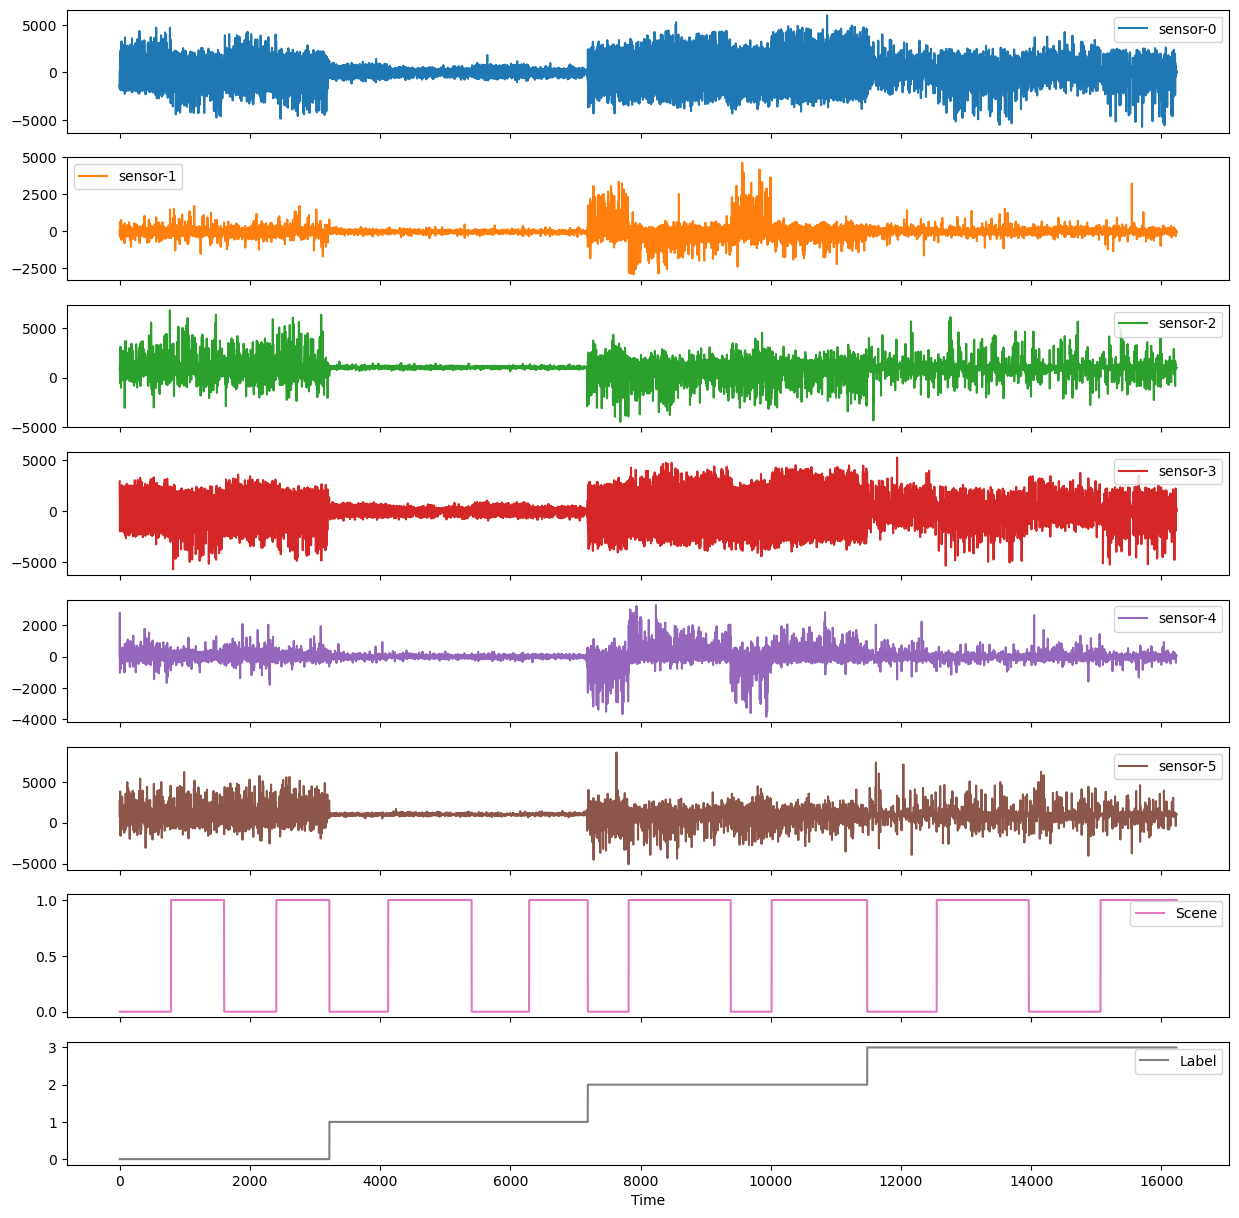

In [7]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [8]:
print(X)       
print(X.shape)       

[[[-1.51304489e+03 -2.52531845e+02  7.90045000e+02  2.91501357e+03
    3.38644457e+01  8.40725000e+02]
  [-4.23156370e+02  4.01716850e+01  7.35970000e+02 -1.37245768e+03
    1.25083704e+02  1.20931500e+03]
  [ 2.44283453e+01  3.55277707e+02  7.35970000e+02 -1.27352961e+01
   -4.45894011e+01  9.65370000e+02]
  ...
  [ 8.74464880e+01 -2.17463902e+01  1.03060000e+03 -1.35753421e+03
   -4.33715828e+01  8.48240000e+02]
  [ 1.95333949e+01 -1.52124262e+01  1.02284000e+03 -5.84424242e+01
   -1.10147129e+01  7.57795000e+02]
  [-3.24893440e+01 -6.55508000e+01  9.59300000e+02  7.76859424e+00
   -2.42152174e+02  7.61185000e+02]]

 [[-1.29578041e+03 -2.12798971e+02  9.89130000e+02  2.08854024e+03
    7.28504967e+02  1.05897000e+03]
  [-1.32222613e+03 -2.07417246e+02  8.10900000e+02  1.33703132e+03
    1.00953126e+03  1.05000000e+03]
  [-1.51304489e+03 -2.52531845e+02  7.90045000e+02  2.70362921e+03
   -1.81706929e+01  3.28312000e+03]
  ...
  [ 7.73694526e+02  1.06102681e+02  3.51519000e+03 -9.94150

In [9]:
Y=to_categorical(Y)

In [10]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [ ]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["Diagonal","Herringbone","DoublePoling","KickDoublePoling"]

Y_pred_total=np.array([])
Y_val_total=np.array([])


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]

    #normalizamos valores (18 valores=6 señales imu x 3 sensores)
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

SCENE: 0
index_test [    0     1     2 ... 15063 15064 15065]
index_train [  789   790   791 ... 16231 16232 16233]
[[   7.91475529    7.06631169    7.35992319 ...    8.35309198
     8.29590644    9.53985558]
 [   7.63434689    8.1581607     8.31379963 ...   10.94012669
     9.08281731    8.9780101 ]
 [   8.96216148    9.07977599    8.9618822  ...    9.40200441
     9.52042911    9.28451261]
 ...
 [ 183.96847814  230.87578492  222.58938726 ...  465.21775717
  -255.5137417  -487.31441739]
 [  36.15217928  133.39502607  138.61804516 ...  117.13266631
   332.81299628  365.33499535]
 [ -32.94545318  -26.38005305   18.87510527 ...   42.97794551
    73.6173564   -21.65956087]]
avg_v,std_v: 20.19870692895492 1236.2718225210456
[[-105.89844626 -105.0796401  -103.57596289 ...  -97.12970904
   -96.18837975  -98.36553903]
 [-103.56665049 -103.06618403 -103.3214031  ...  -95.74467477
   -96.00043951  -97.03332913]
 [-104.46901455 -103.42821166 -102.42246235 ...  -97.42684179
   -99.36908915  -99.5

In [ ]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()